In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from plotly.offline import init_notebook_mode, plot

# Exploratory data analysis of the government response to COVID-19 dataset

Import data from https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker#data in timeseries format.

In [4]:
data_dict=pd.read_excel('oxford.xlsx',sheet_name=None)

Here we can see all available dataframes and names of available measures (the data comes in separate excel sheets):


In [5]:
data_dict.keys()

odict_keys(['index_governmentresponse', 'index_containmenthealth', 'index_stringency', 'index_economicsupport', 'c1_schoolclosing', 'c1_flag', 'c2_workplaceclosing', 'c2_flag', 'c3_cancelpublicevents', 'c3_flag', 'c4_restrictionsongatherings', 'c4_flag', 'c5_closepublictransport', 'c5_flag', 'c6_stayathomerequirements', 'c6_flag', 'c7_domestictravel', 'c7_flag', 'c8_internationaltravel', 'e1_incomesupport', 'e1_flag', 'e2_debtcontractrelief', 'h1_publicinfocampaign', 'h1_flag', 'h2_testingpolicy', 'h3_contacttracing', 'confirmedcases', 'confirmeddeaths'])

In [6]:
data_dict['index_governmentresponse'].head()


CountryName CountryCode  01jan2020  02jan2020  03jan2020  04jan2020  \
0        Aruba         ABW        0.0        0.0        0.0        0.0   
1  Afghanistan         AFG        0.0        0.0        0.0        0.0   
2       Angola         AGO        0.0        0.0        0.0        0.0   
3     Anguilla         AIA        0.0        0.0        0.0        0.0   
4      Albania         ALB        0.0        0.0        0.0        0.0   

   05jan2020  06jan2020  07jan2020  08jan2020    ...      20sep2020  \
0        0.0        0.0        0.0        0.0    ...      62.500000   
1        0.0        0.0        0.0        0.0    ...      26.280001   
2        0.0        0.0        0.0        0.0    ...      64.739998   
3        0.0        0.0        0.0        0.0    ...      29.490000   
4        0.0        0.0        0.0        0.0    ...      50.639999   

   21sep2020  22sep2020  23sep2020  24sep2020  25sep2020  26sep2020  \
0  58.650002  58.650002  58.650002  58.650002  58.650002  58.650002   
1  26.280001        NaN        NaN        NaN        NaN        NaN   
2  64.739998  64.739998  64.739998  64.739998  64.739998  64.739998   
3  29.490000  29.490000  29.490000  29.490000  29.490000  29.490000   
4  50.639999  50.639999        NaN        NaN        NaN        NaN   

   27sep2020  28sep2020  29sep2020  
0  58.650002  58.650002        NaN  
1        NaN        NaN        NaN  
2  64.739998  64.739998        NaN  
3  29.490000        NaN        NaN  
4        NaN        NaN        NaN  

[5 rows x 275 columns]

# **1. Response rate and number of cases for selected countries**

Plot time series of response and confirmed cases for selected countries:

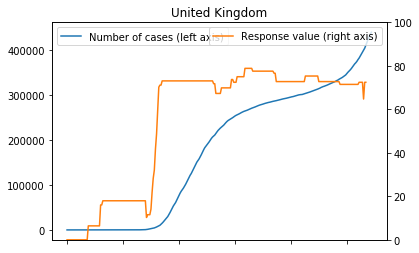

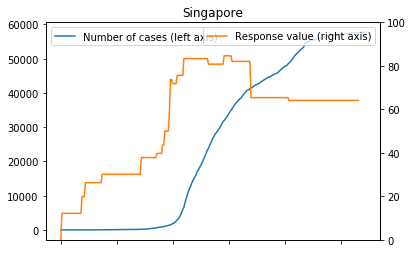

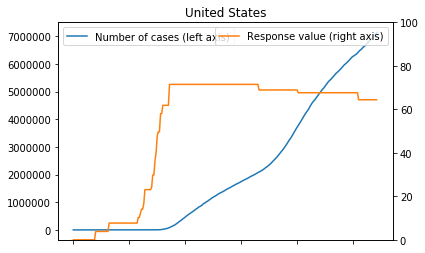

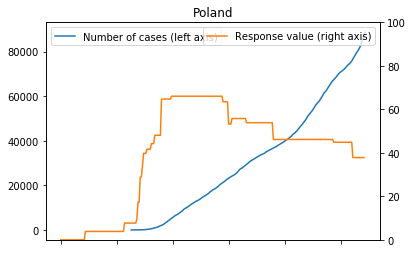

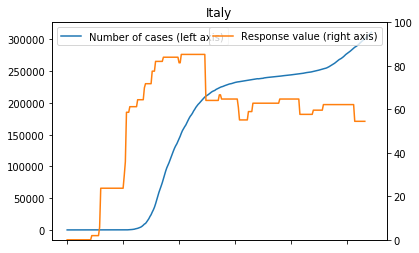

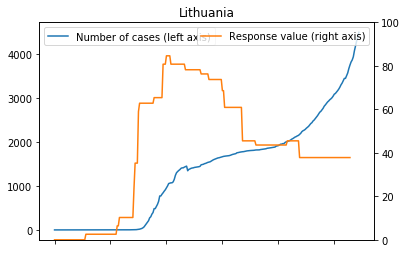

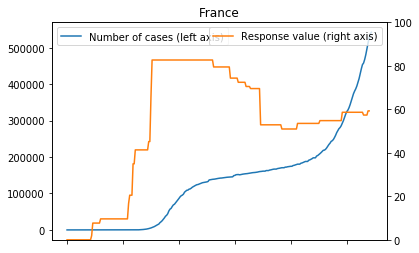

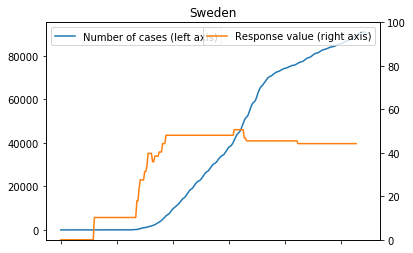

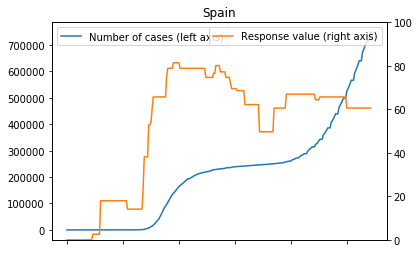

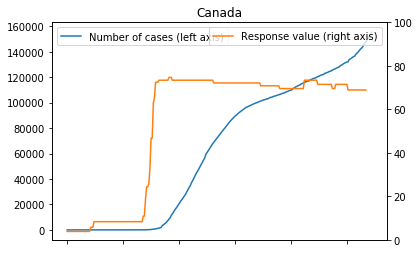

In [7]:
for plotcountry in ["United Kingdom",'Singapore','United States', 'Poland', 'Italy','Lithuania','France','Sweden','Spain','Canada']:
    cases=data_dict['confirmedcases'].loc[data_dict['confirmedcases']['CountryName']==plotcountry].T
    cases.drop(index=['CountryName','CountryCode'],inplace=True)
    cases.rename(mapper={cases.columns[0]:"cases"},inplace=True,axis=1)
#

    plotdata=data_dict['index_governmentresponse'].loc[data_dict['index_governmentresponse']['CountryName']==plotcountry].T
    plotdata.drop(index=['CountryName','CountryCode'],inplace=True)
    plotdata.rename(mapper={plotdata.columns[0]:"responsevalue"},inplace=True,axis=1)
    plotdata=pd.concat([cases,plotdata],axis=1)
    plt.figure()
    ax1=plotdata.cases.plot(use_index=True)
    ax2=plotdata.responsevalue.plot(secondary_y=True,use_index=True)
    ax1.legend(['Number of cases (left axis)'])
    ax2.legend(['Response value (right axis)'])
    ax2.set_ylim((0,100))
    plt.title(plotcountry)


**Insights** 


*   We need countries' population data to make sense whether the number of confirmed cases is high or low for given countries. 
*   We can see some examples of the countries which highest response value was bellow 80 (Sweden, Poland, USA, Canada, maybe others). It would be interesting to compare mitigation measures and number of cases between the countries which maintain low response value with the countries which impose severe measures (high response value) even if for short amount of time (Spain, Italy, Lithuania, Singapore).
* We want to investigate which specific measures imposed contributed towards the response value. See the section bellow.




# **2 What measures are these countries imposing?**
Next, let's investigate when and at what level different measures were imposed at selected countries:


<Figure size 432x288 with 0 Axes>

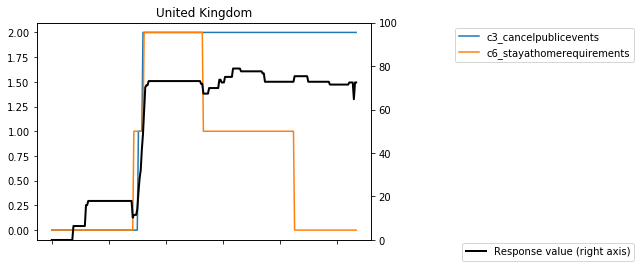

<Figure size 432x288 with 0 Axes>

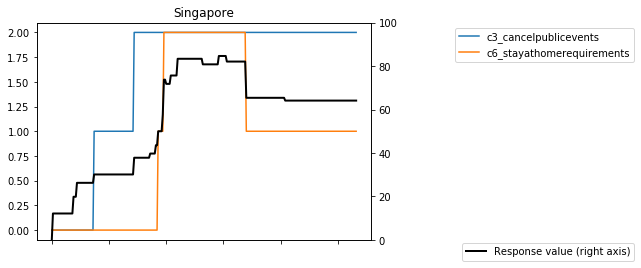

<Figure size 432x288 with 0 Axes>

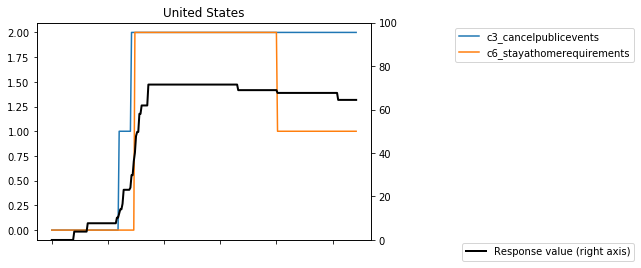

<Figure size 432x288 with 0 Axes>

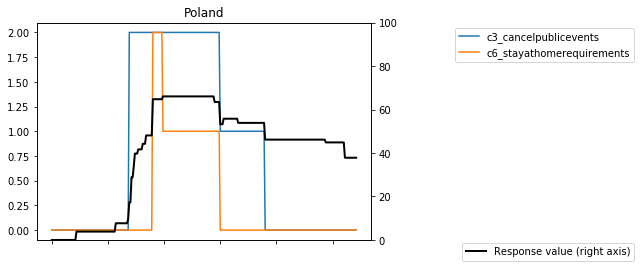

<Figure size 432x288 with 0 Axes>

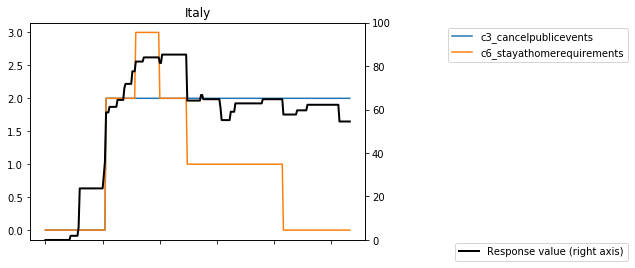

<Figure size 432x288 with 0 Axes>

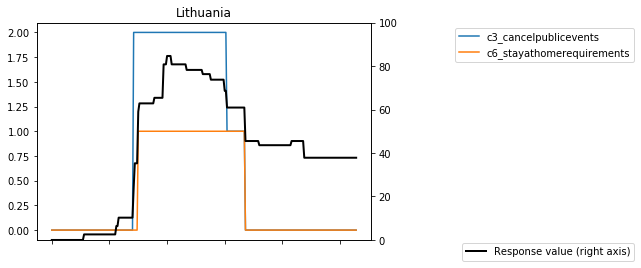

In [8]:
# Full list of measures: plotmeasures=['c1_schoolclosing', 'c2_workplaceclosing', 'c3_cancelpublicevents', 'c4_restrictionsongatherings', 'c5_closepublictransport', 'c6_stayathomerequirements', 'c7_domestictravel', 'c8_internationaltravel', 'e1_incomesupport', 'e2_debtcontractrelief', 'h1_publicinfocampaign', 'h2_testingpolicy', 'h3_contacttracing']
plotmeasures=[ 'c3_cancelpublicevents','c6_stayathomerequirements']
for plotcountry in ["United Kingdom",'Singapore','United States', 'Poland', 'Italy','Lithuania']:
    plotdata=data_dict['index_governmentresponse'].loc[data_dict['index_governmentresponse']['CountryName']==plotcountry].T
    plotdata.drop(index=['CountryName','CountryCode'],inplace=True)
    plotdata.rename(mapper={plotdata.columns[0]:"responsevalue"},inplace=True,axis=1)
    for measure in plotmeasures:
        measuredata=data_dict[measure].loc[data_dict[measure]['CountryName']==plotcountry].T
        measuredata.drop(index=['CountryName','CountryCode'],inplace=True)
        
        measuredata.rename(mapper={measuredata.columns[0]:measure},inplace=True,axis=1)
        plotdata=pd.concat([plotdata,measuredata],axis=1)
    
    
    plt.figure()
    ax1=plotdata[plotmeasures].plot(use_index=True)
    ax2=plotdata.responsevalue.plot(secondary_y=True,use_index=True,linewidth=2,color='k')
    ax1.legend(bbox_to_anchor=(1.8,1))
    ax2.legend(['Response value (right axis)'],bbox_to_anchor=(1.8,0.01))
    ax2.set_ylim((0,100))
    plt.title(plotcountry)


**Insights**



*   All Singapore, United Kingdom and USA have imposed restrictions on social gathering throughout all summer months but have differences in school and workplace closures.


Plot of measures and number of cases:

<Figure size 432x288 with 0 Axes>

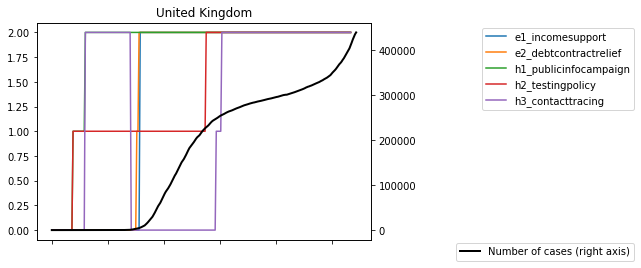

<Figure size 432x288 with 0 Axes>

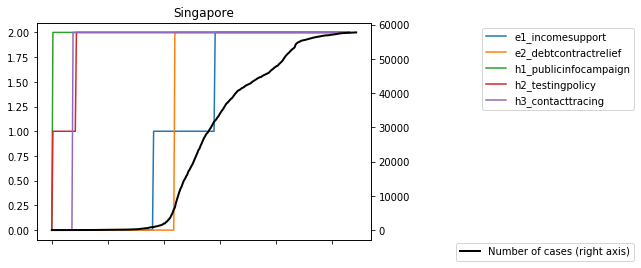

<Figure size 432x288 with 0 Axes>

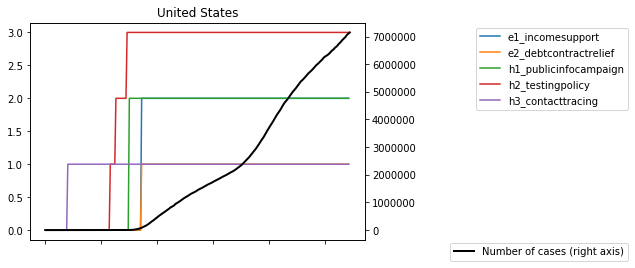

<Figure size 432x288 with 0 Axes>

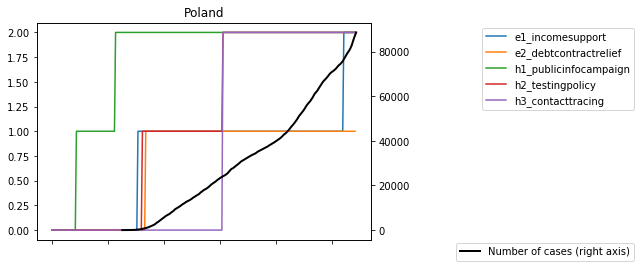

<Figure size 432x288 with 0 Axes>

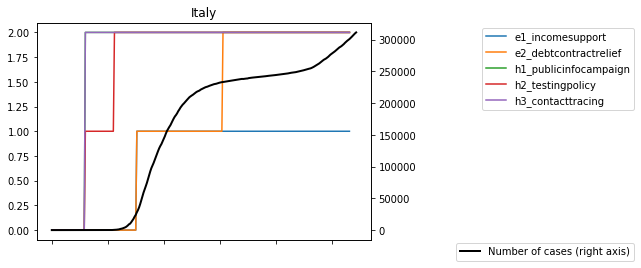

<Figure size 432x288 with 0 Axes>

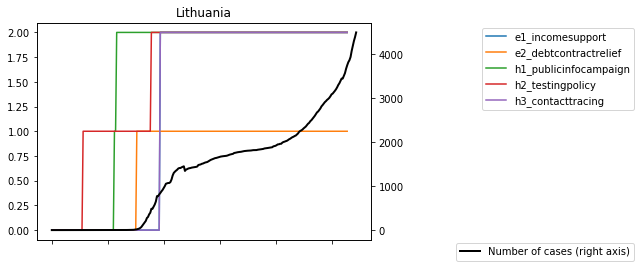

In [9]:
# Full list of measures: plotmeasures=['c1_schoolclosing', 'c2_workplaceclosing', 'c3_cancelpublicevents', 'c4_restrictionsongatherings', 'c5_closepublictransport', 'c6_stayathomerequirements', 'c7_domestictravel', 'c8_internationaltravel', 'e1_incomesupport', 'e2_debtcontractrelief', 'h1_publicinfocampaign', 'h2_testingpolicy', 'h3_contacttracing']
plotmeasures=['e1_incomesupport', 'e2_debtcontractrelief', 'h1_publicinfocampaign', 'h2_testingpolicy', 'h3_contacttracing']
for plotcountry in ["United Kingdom",'Singapore','United States', 'Poland', 'Italy','Lithuania']:
    plotdata=data_dict['confirmedcases'].loc[data_dict['confirmedcases']['CountryName']==plotcountry].T
    plotdata.drop(index=['CountryName','CountryCode'],inplace=True)
    plotdata.rename(mapper={plotdata.columns[0]:"cases"},inplace=True,axis=1)
    for measure in plotmeasures:
        measuredata=data_dict[measure].loc[data_dict[measure]['CountryName']==plotcountry].T
        measuredata.drop(index=['CountryName','CountryCode'],inplace=True)
        
        measuredata.rename(mapper={measuredata.columns[0]:measure},inplace=True,axis=1)
        plotdata=pd.concat([plotdata,measuredata],axis=1)
    
    
    plt.figure()
    ax1=plotdata[plotmeasures].plot(use_index=True)
    ax2=plotdata.cases.plot(secondary_y=True,use_index=True,linewidth=2,color='k')
    ax1.legend(bbox_to_anchor=(1.8,1))
    ax2.legend(['Number of cases (right axis)'],bbox_to_anchor=(1.8,0.01))
    plt.title(plotcountry)


**Insights**


*   How is the imposition of economic measures correlated with the number of cases?






# Grouping the countries by maximum response rate 




Calculate countries' maximum response rate as well as maximum level of each measure imposed and investigate the distribution. 

In [10]:
fulldata=pd.read_csv('OxCGRT_latest.csv',low_memory=False)
fulldata.columns


Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode', 'Date',
       'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag',
       'C3_Cancel public events', 'C3_Flag', 'C4_Restrictions on gatherings',
       'C4_Flag', 'C5_Close public transport', 'C5_Flag',
       'C6_Stay at home requirements', 'C6_Flag',
       'C7_Restrictions on internal movement', 'C7_Flag',
       'C8_International travel controls', 'E1_Income support', 'E1_Flag',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H1_Flag', 'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'ConfirmedCases', 'ConfirmedDeaths', 'StringencyIndex',
       'StringencyIndexForDisplay', 'StringencyLegacyIndex',
       'StringencyLegacyIndexForDisplay', 'GovernmentResponseIndex',
       'GovernmentResponseIndexForDisplay', 'ContainmentHealth

In [11]:
measurelist=['C1_School closing',  'C2_Workplace closing',  'C3_Cancel public events', 'C4_Restrictions on gatherings',  'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines']
countrieslist=fulldata['CountryName'].unique()
countrydata=pd.DataFrame(columns=['CountryName','MaxResponse','C1_School closing',  'C2_Workplace closing',  'C3_Cancel public events', 'C4_Restrictions on gatherings',  'C5_Close public transport', 'C6_Stay at home requirements', 'C7_Restrictions on internal movement', 'C8_International travel controls', 'E1_Income support', 'E2_Debt/contract relief', 'H1_Public information campaigns', 'H2_Testing policy', 'H3_Contact tracing', 'H4_Emergency investment in healthcare', 'H5_Investment in vaccines'])
countrydata['CountryName']=countrieslist
countrydata.head()

CountryName MaxResponse C1_School closing C2_Workplace closing  \
0        Aruba         NaN               NaN                  NaN   
1  Afghanistan         NaN               NaN                  NaN   
2       Angola         NaN               NaN                  NaN   
3     Anguilla         NaN               NaN                  NaN   
4      Albania         NaN               NaN                  NaN   

  C3_Cancel public events C4_Restrictions on gatherings  \
0                     NaN                           NaN   
1                     NaN                           NaN   
2                     NaN                           NaN   
3                     NaN                           NaN   
4                     NaN                           NaN   

  C5_Close public transport C6_Stay at home requirements  \
0                       NaN                          NaN   
1                       NaN                          NaN   
2                       NaN                          NaN   
3                       NaN                          NaN   
4                       NaN                          NaN   

  C7_Restrictions on internal movement C8_International travel controls  \
0                                  NaN                              NaN   
1                                  NaN                              NaN   
2                                  NaN                              NaN   
3                                  NaN                              NaN   
4                                  NaN                              NaN   

  E1_Income support E2_Debt/contract relief H1_Public information campaigns  \
0               NaN                     NaN                             NaN   
1               NaN                     NaN                             NaN   
2               NaN                     NaN                             NaN   
3               NaN                     NaN                             NaN   
4               NaN                     NaN                             NaN   

  H2_Testing policy H3_Contact tracing H4_Emergency investment in healthcare  \
0               NaN                NaN                                   NaN   
1               NaN                NaN                                   NaN   
2               NaN                NaN                                   NaN   
3               NaN                NaN                                   NaN   
4               NaN                NaN                                   NaN   

  H5_Investment in vaccines  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

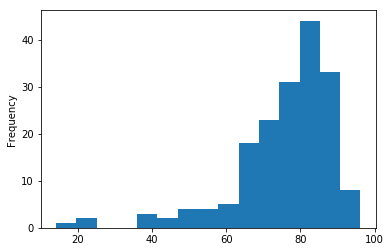

In [47]:
for country in countrieslist:
    countrydata.loc[countrydata['CountryName']==country,'MaxResponse']=(fulldata[fulldata['CountryName']==country]['GovernmentResponseIndex']).max()
    for measure in measurelist: 
        countrydata.loc[countrydata['CountryName']==country,measure]=(fulldata[fulldata['CountryName']==country][measure]).max()
countrydata['MaxResponse'].plot.hist(bins=15)
plt.show()


In [13]:
for measure in measurelist:
    countrydata[measure]=countrydata[measure].apply(lambda x: float(x))
countrydata['MaxResponse']=countrydata['MaxResponse'].apply(lambda x: float(x))
countrydata.dtypes

countrydata.dropna(inplace=True)
countrydata.describe()

MaxResponse  C1_School closing  C2_Workplace closing  \
count   178.000000         178.000000            178.000000   
mean     75.288258           2.926966              2.550562   
std      13.390516           0.383638              0.728922   
min      14.100000           0.000000              0.000000   
25%      70.030000           3.000000              2.000000   
50%      78.690000           3.000000              3.000000   
75%      84.620000           3.000000              3.000000   
max      96.150000           3.000000              3.000000   

       C3_Cancel public events  C4_Restrictions on gatherings  \
count               178.000000                     178.000000   
mean                  1.943820                       3.500000   
std                   0.295333                       1.031975   
min                   0.000000                       0.000000   
25%                   2.000000                       3.000000   
50%                   2.000000                       4.000000   
75%                   2.000000                       4.000000   
max                   2.000000                       4.000000   

       C5_Close public transport  C6_Stay at home requirements  \
count                 178.000000                    178.000000   
mean                    1.292135                      1.977528   
std                     0.791227                      0.869801   
min                     0.000000                      0.000000   
25%                     1.000000                      2.000000   
50%                     1.500000                      2.000000   
75%                     2.000000                      3.000000   
max                     2.000000                      3.000000   

       C7_Restrictions on internal movement  C8_International travel controls  \
count                            178.000000                        178.000000   
mean                               1.797753                          3.780899   
std                                0.545755                          0.466112   
min                                0.000000                          2.000000   
25%                                2.000000                          4.000000   
50%                                2.000000                          4.000000   
75%                                2.000000                          4.000000   
max                                2.000000                          4.000000   

       E1_Income support  E2_Debt/contract relief  \
count         178.000000               178.000000   
mean            1.157303                 1.404494   
std             0.719367                 0.716538   
min             0.000000                 0.000000   
25%             1.000000                 1.000000   
50%             1.000000                 2.000000   
75%             2.000000                 2.000000   
max             2.000000                 2.000000   

       H1_Public information campaigns  H2_Testing policy  H3_Contact tracing  \
count                       178.000000         178.000000          178.000000   
mean                          1.977528           2.084270            1.674157   
std                           0.148631           0.787386            0.547728   
min                           1.000000           0.000000            0.000000   
25%                           2.000000           2.000000            1.000000   
50%                           2.000000           2.000000            2.000000   
75%                           2.000000           3.000000            2.000000   
max                           2.000000           3.000000            2.000000   

       H4_Emergency investment in healthcare  H5_Investment in vaccines  
count                           1.780000e+02               1.780000e+02  
mean                            2.438860e+09               7.433109e+07  
std                             1.883896e+10               3.488668e+08  
min                     

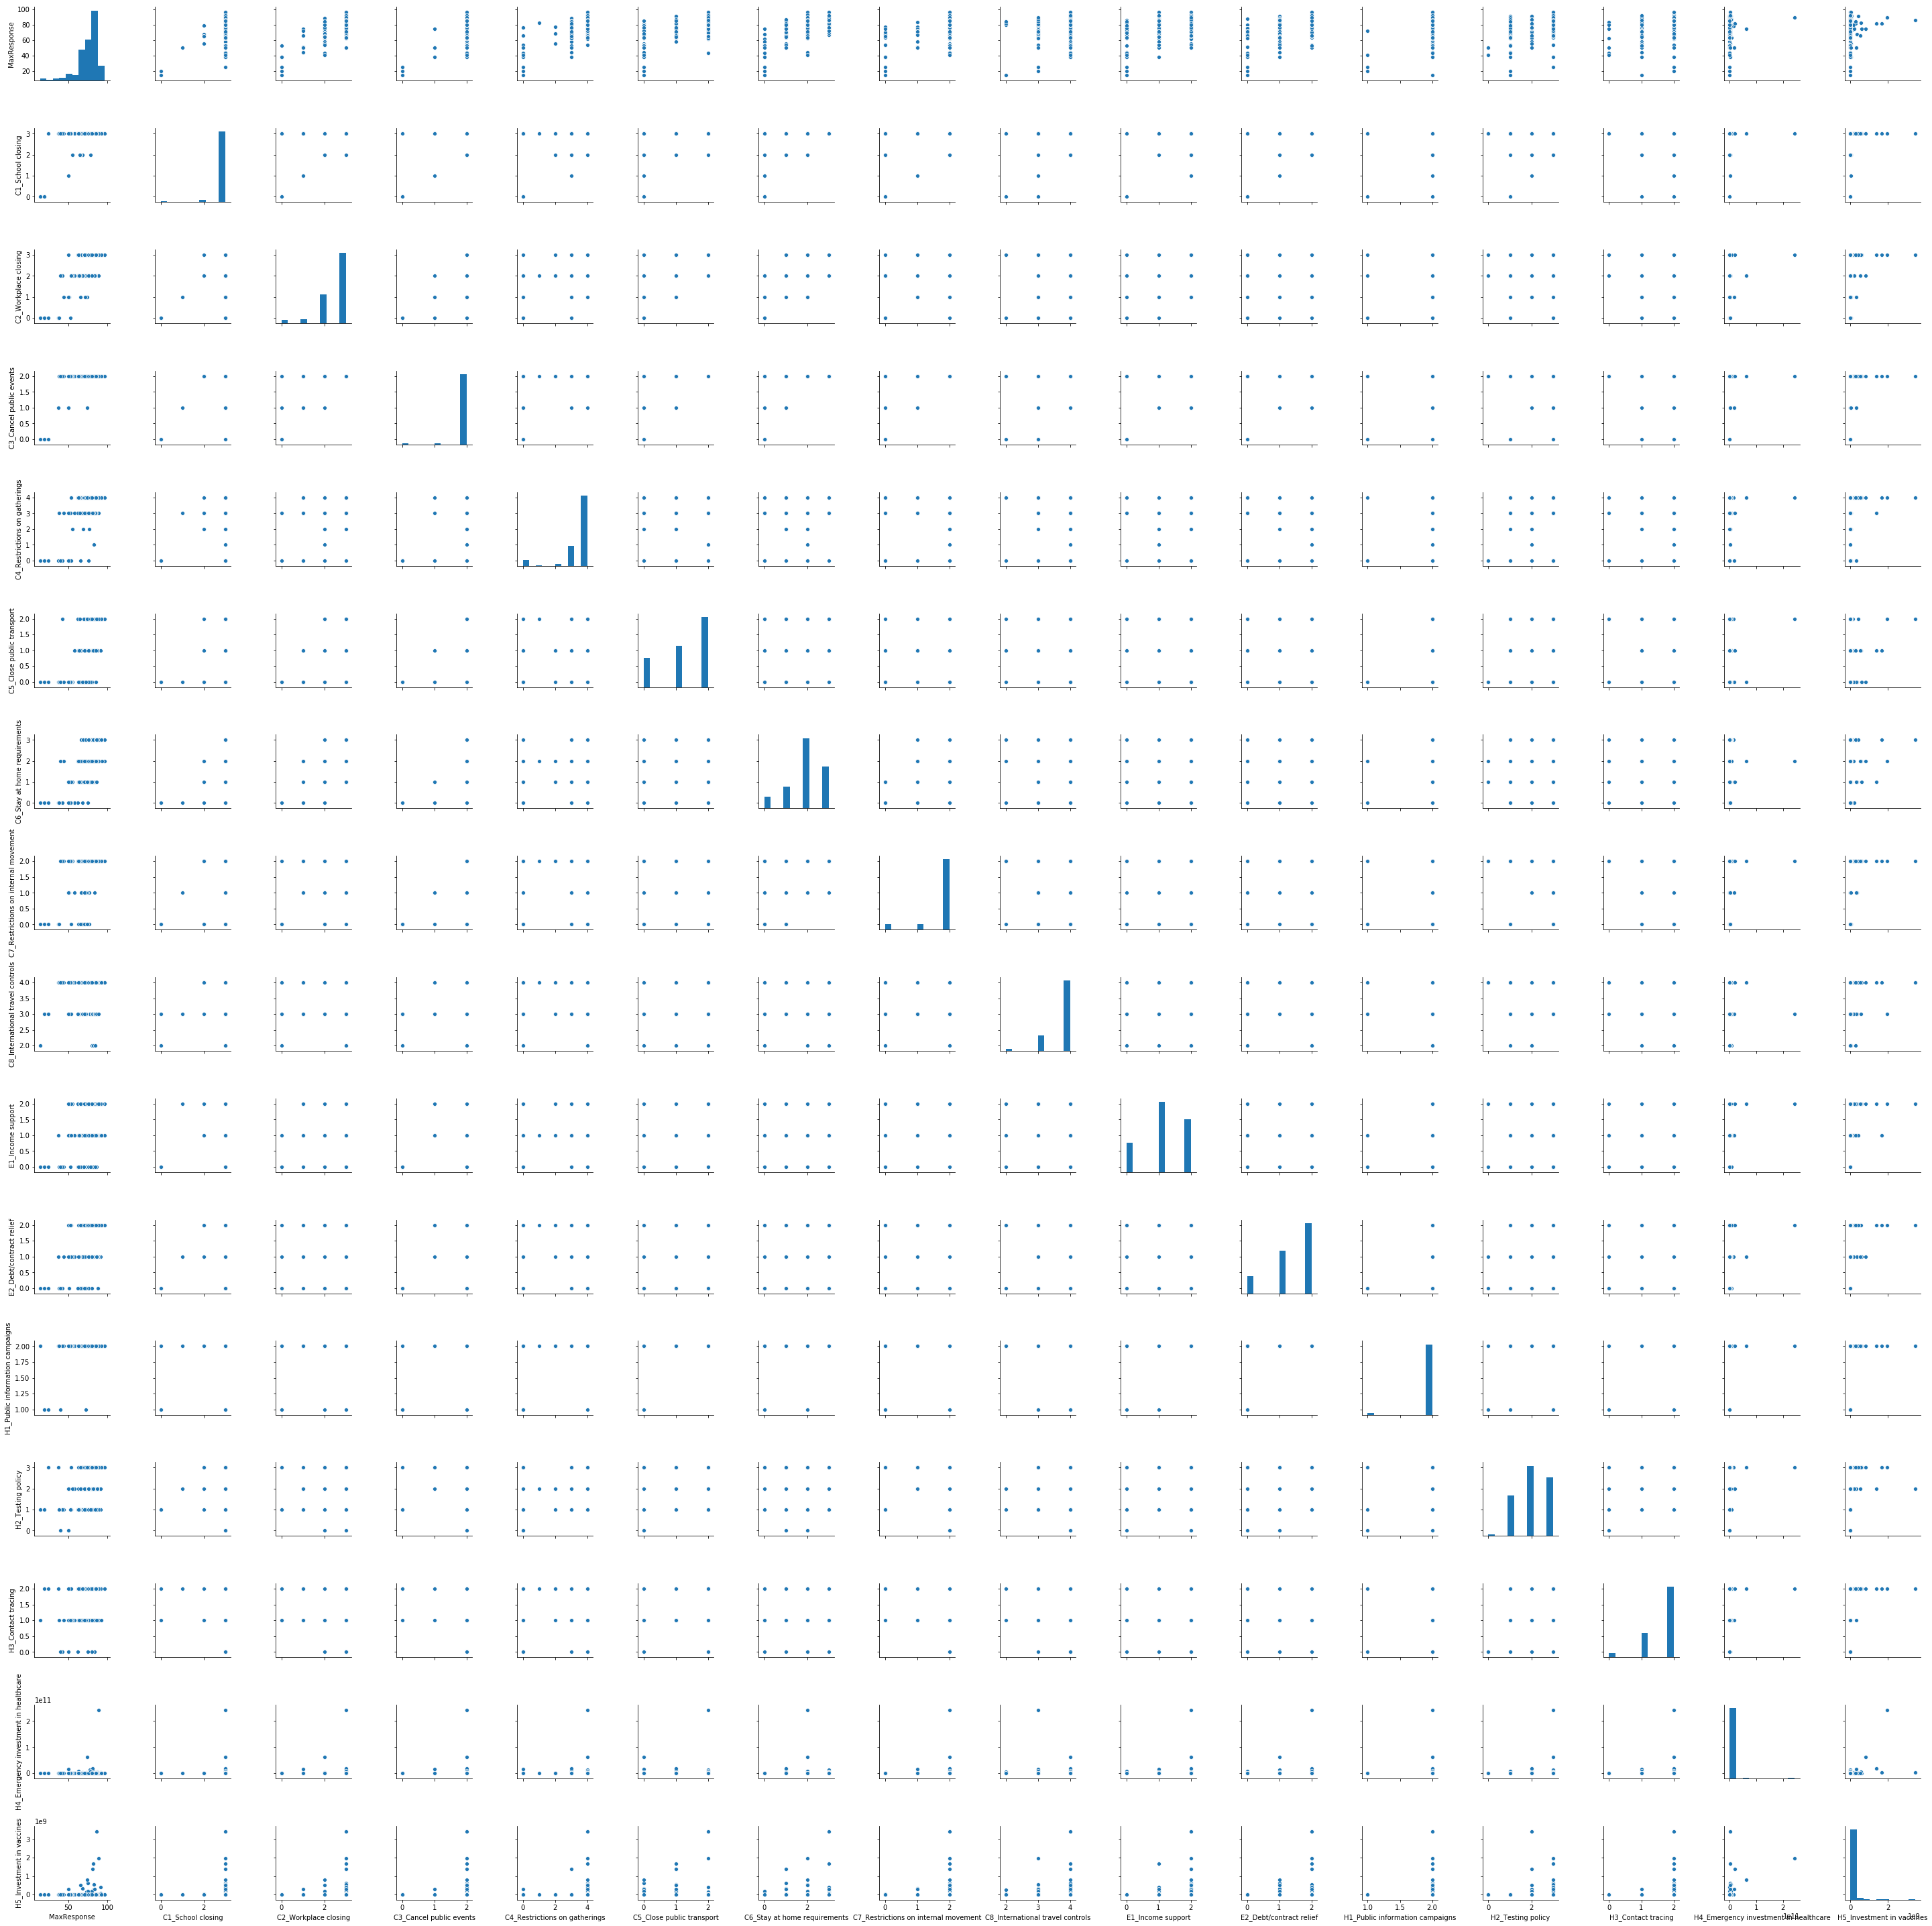

In [14]:
sns.pairplot(countrydata.iloc[:,1:])

# Let's group the countries by the highest response rate above or bellow the mean = 75.



In this section, we split the countries in two groups: group 1 has the highest response rate higher than the mean across all countries (75) and group 0 has the highest response rate equal or lower than the mean across all countries. Then, we estimate the average growth rate of the number of cases during the pandemic and see whether this value differs significantly between the two groups using a t test.

In [48]:
countrydata['group']=countrydata['MaxResponse'].apply(lambda x: 1 if x>75 else 0)

#print(countrydata[countrydata['group']==1]['CountryName'].unique())
#print(countrydata[countrydata['group']==0]['CountryName'].unique())


Next, we look at the percentage growth rate of the cases:

/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


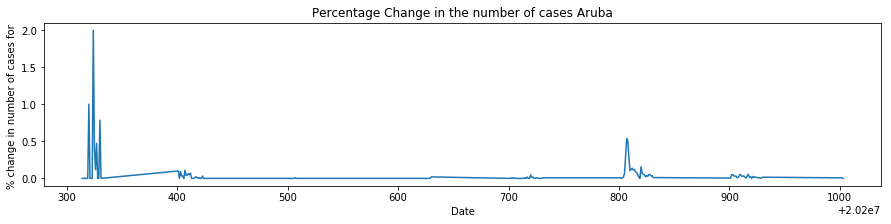

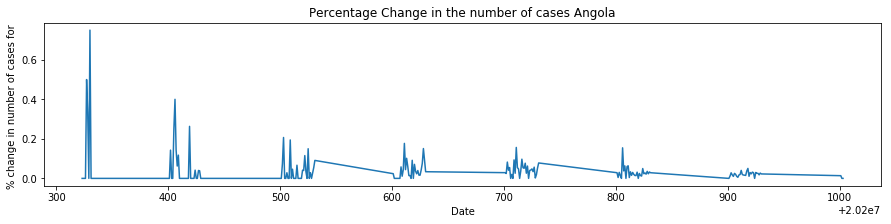

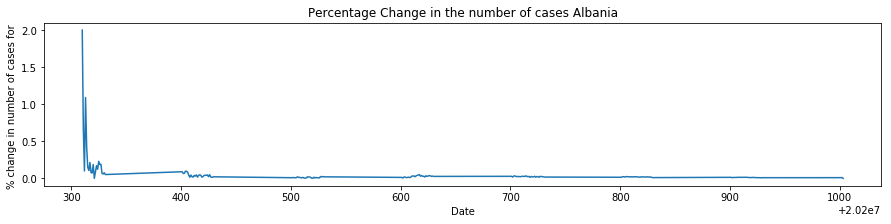

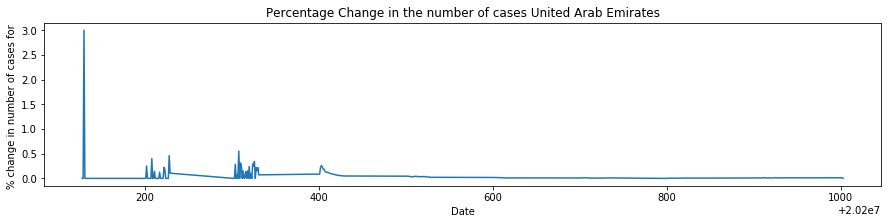

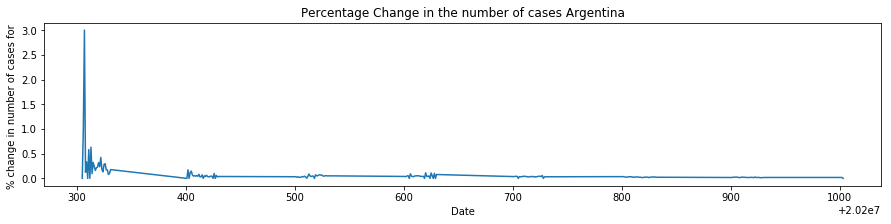

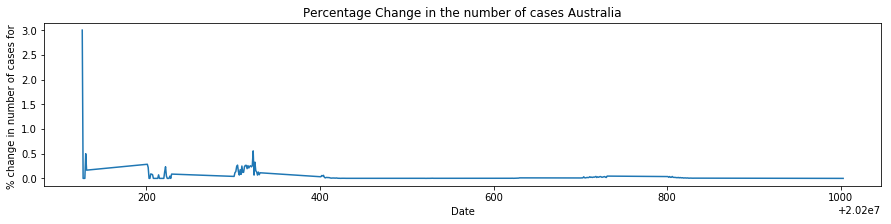

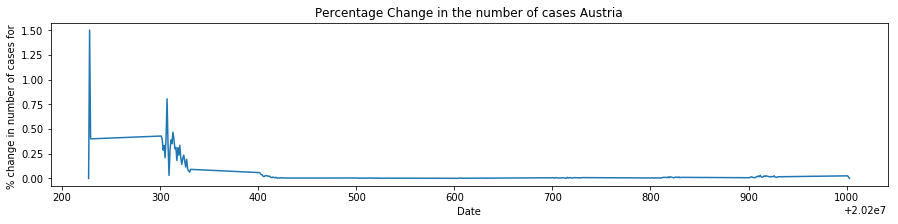

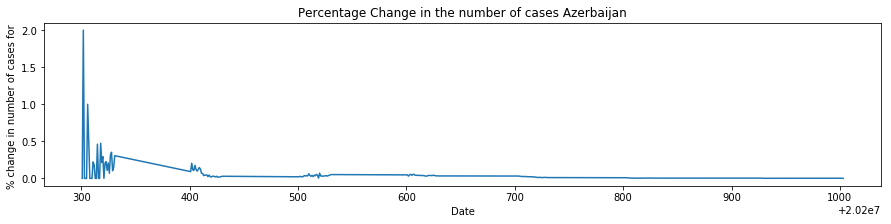

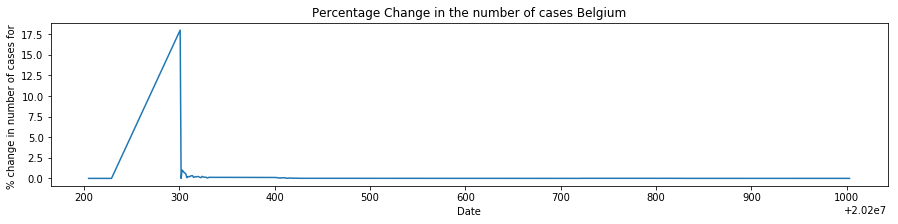

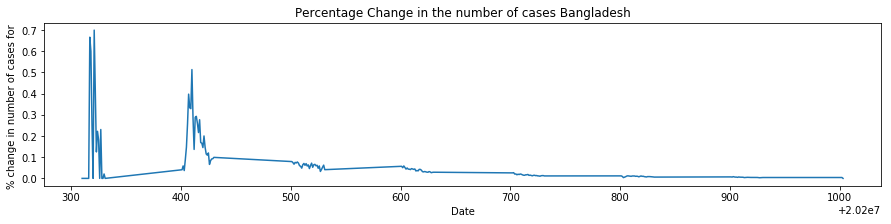

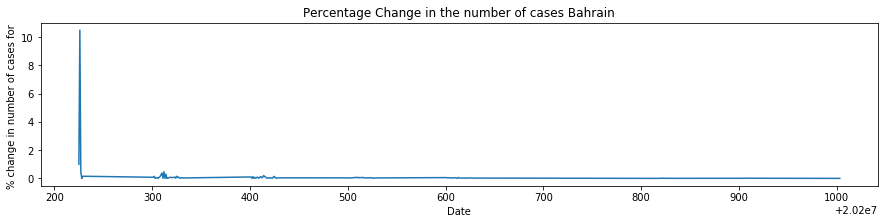

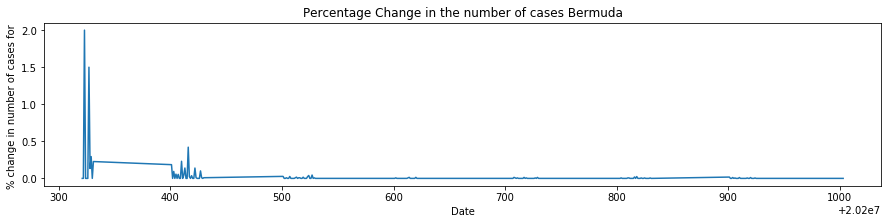

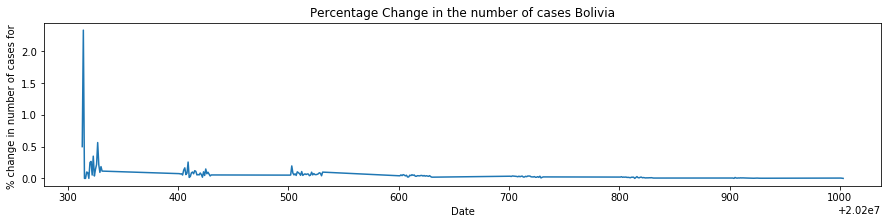

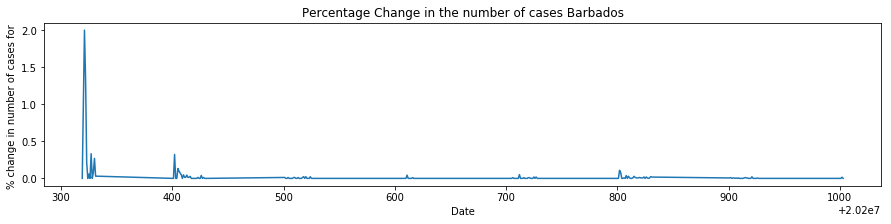

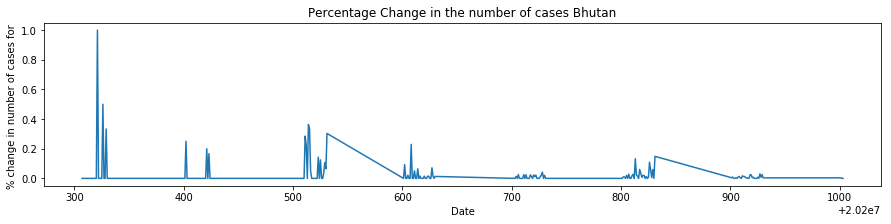

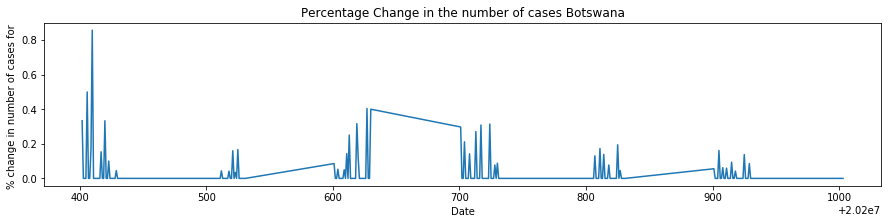

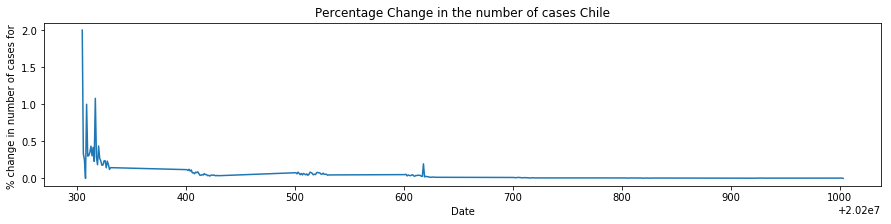

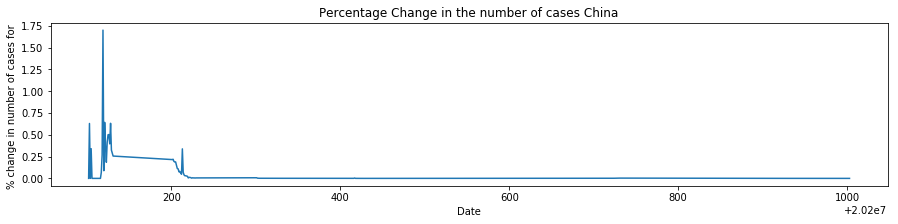

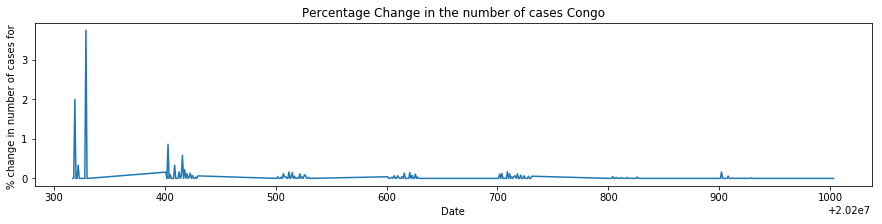

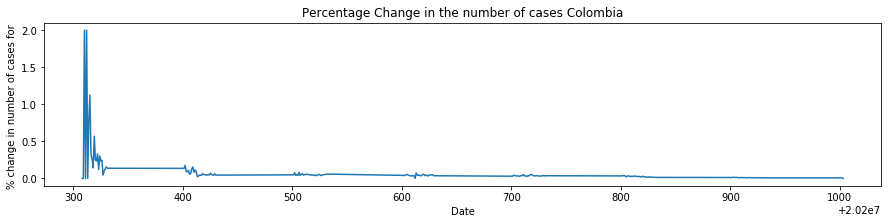

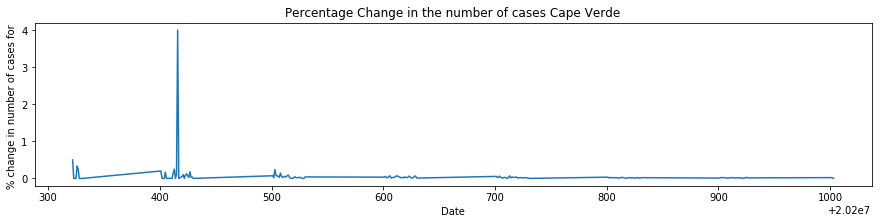

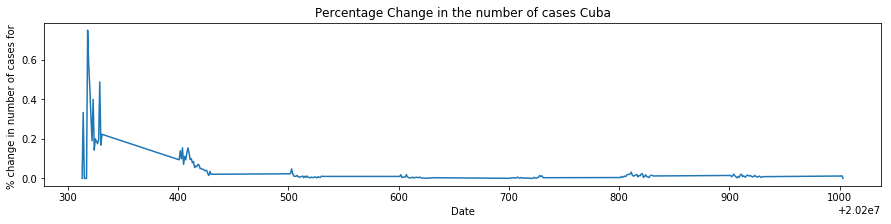

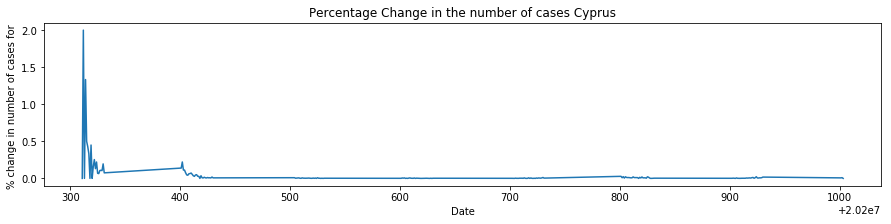

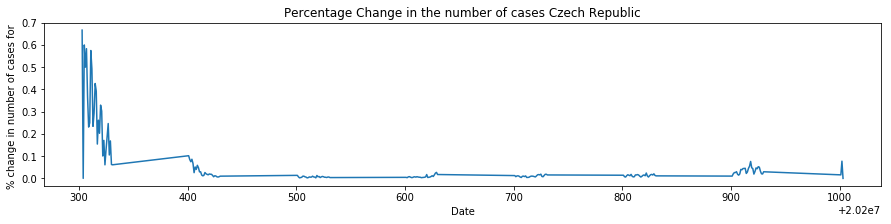

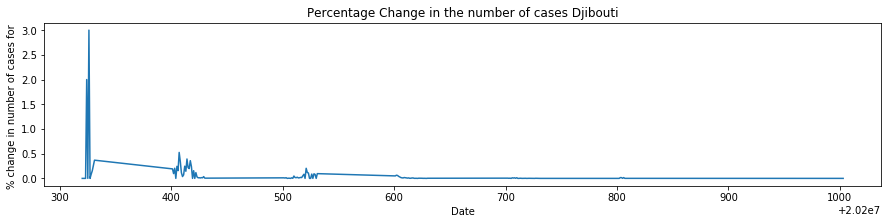

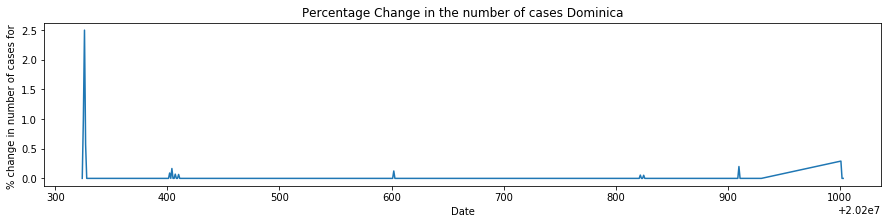

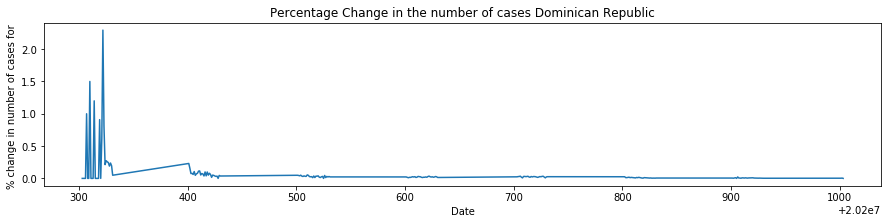

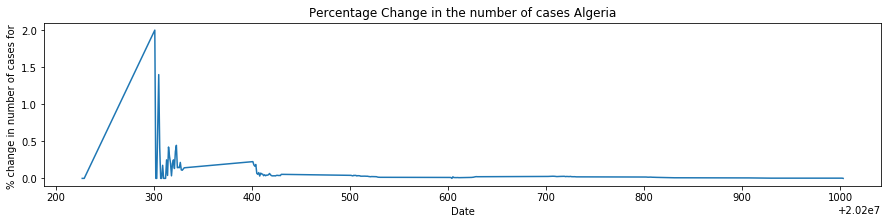

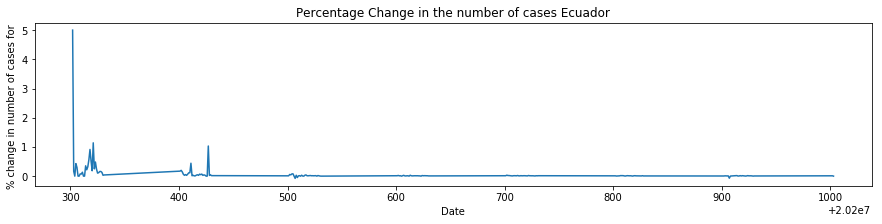

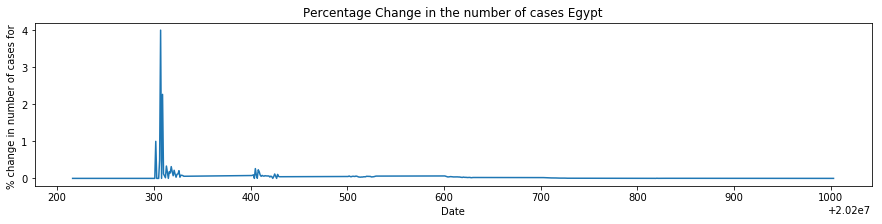

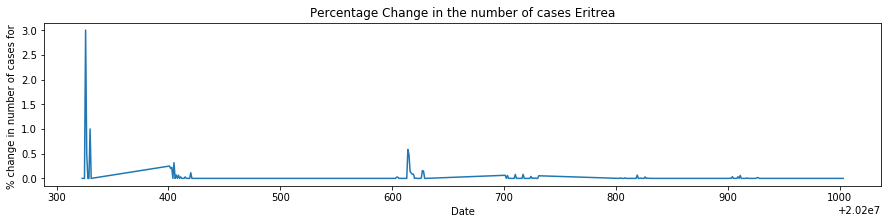

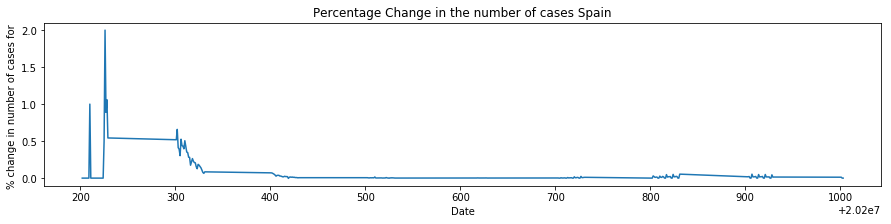

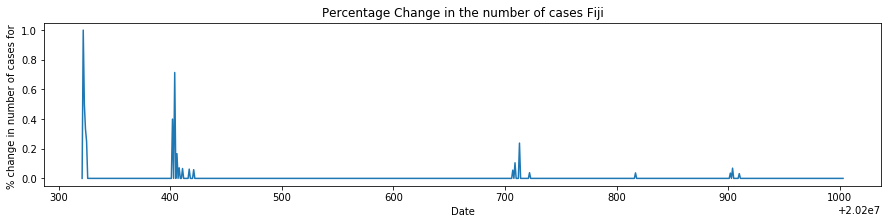

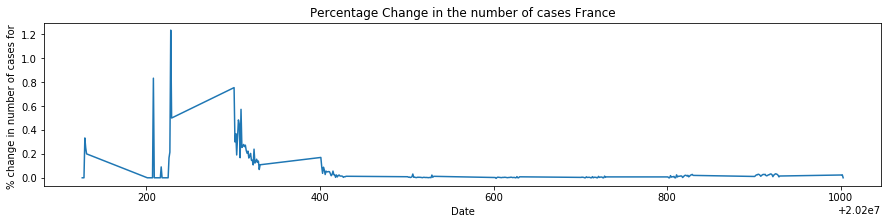

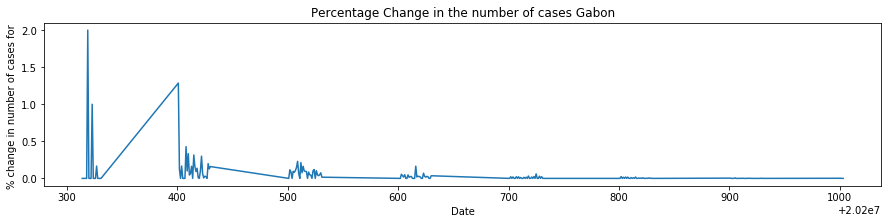

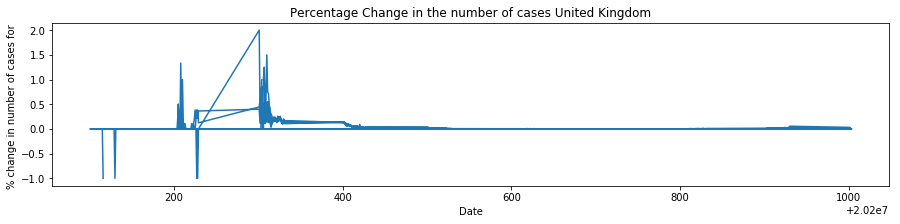

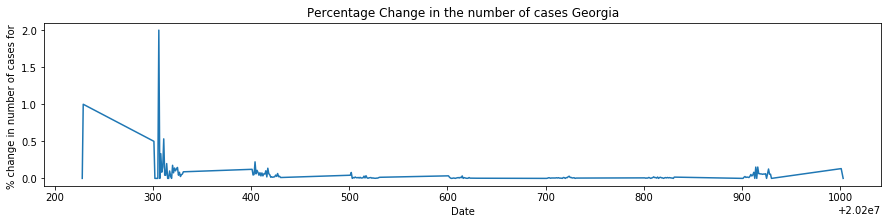

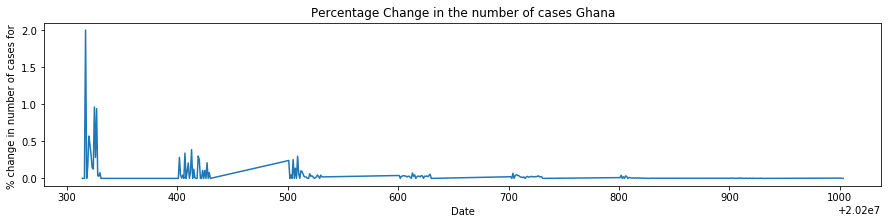

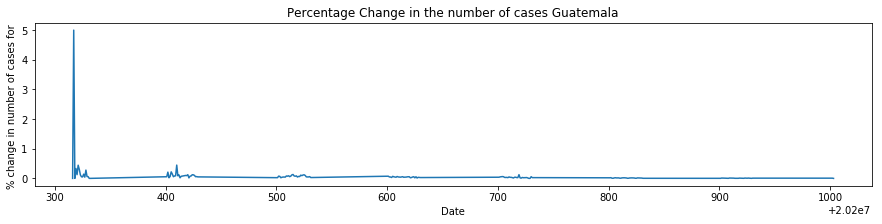

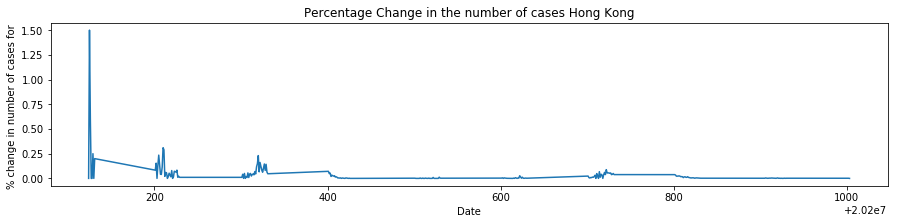

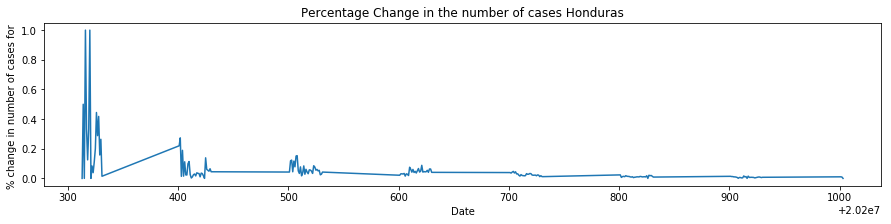

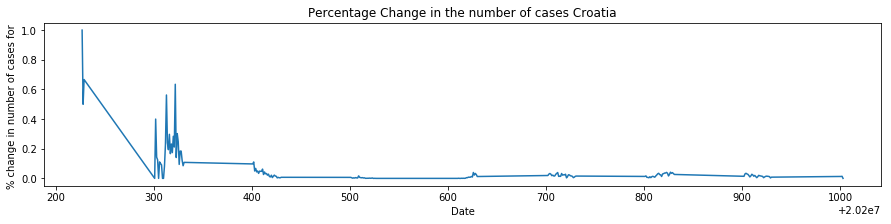

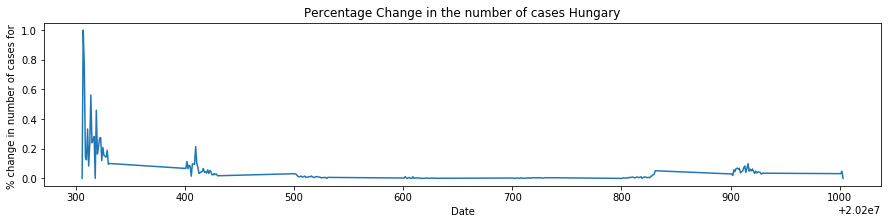

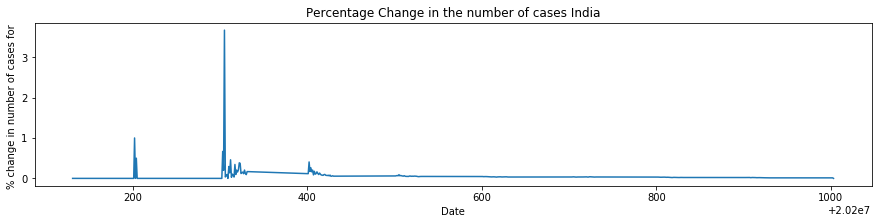

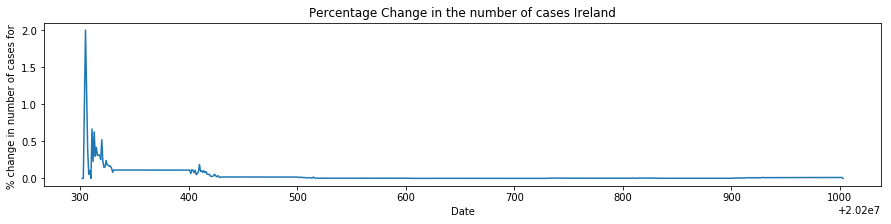

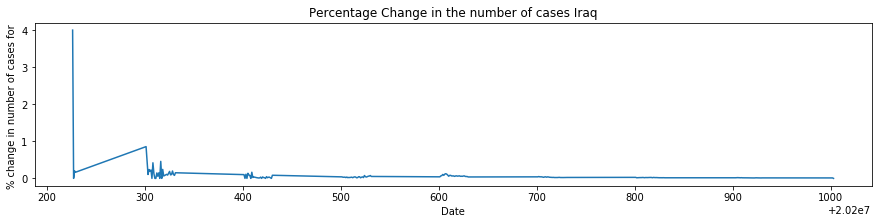

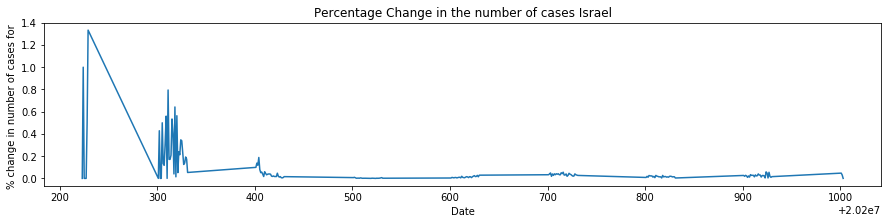

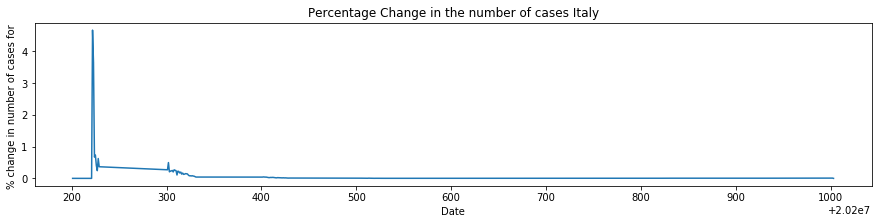

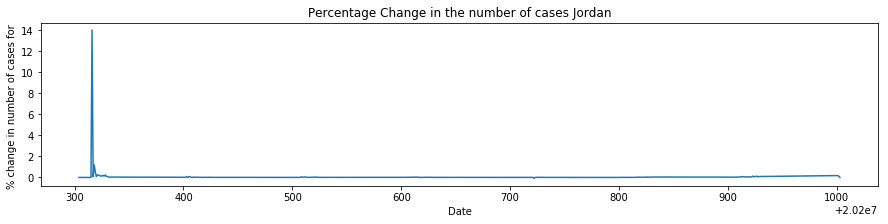

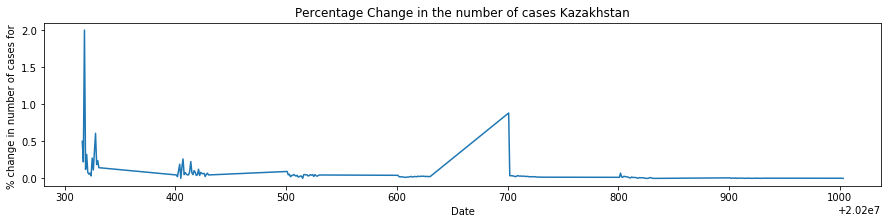

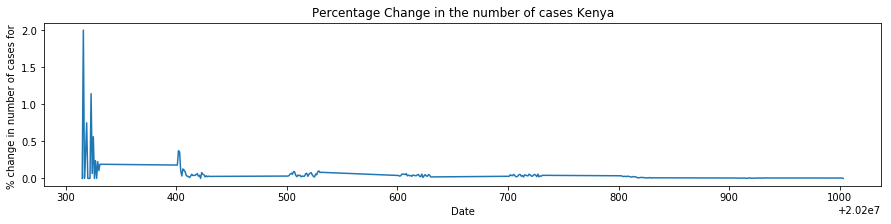

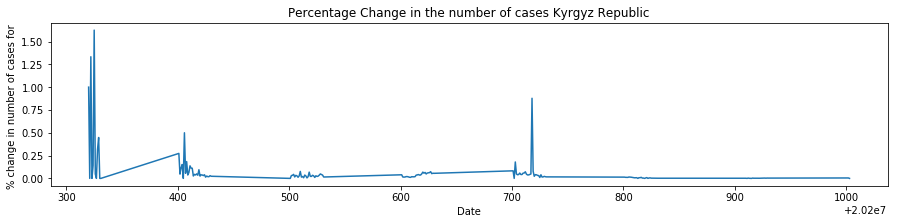

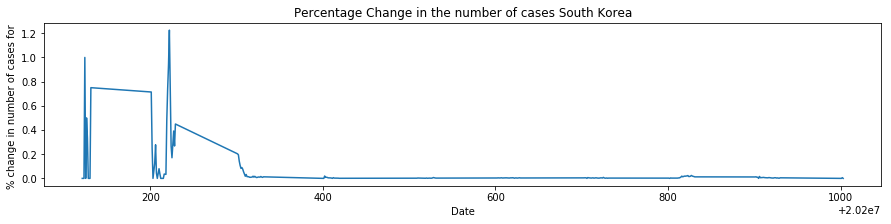

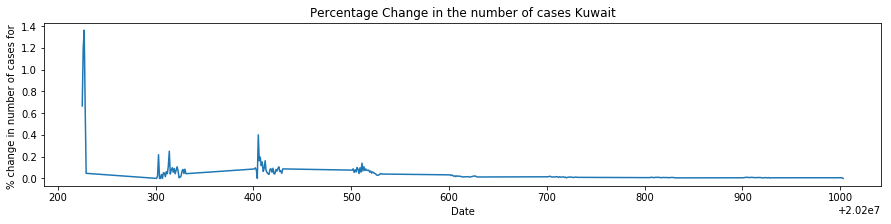

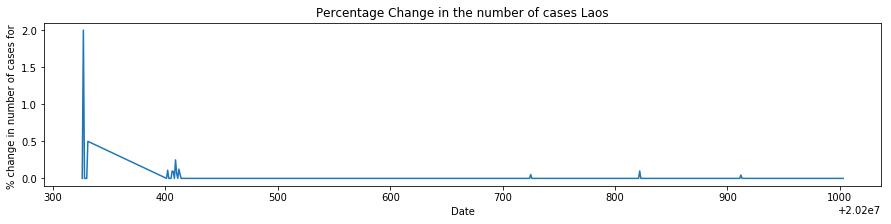

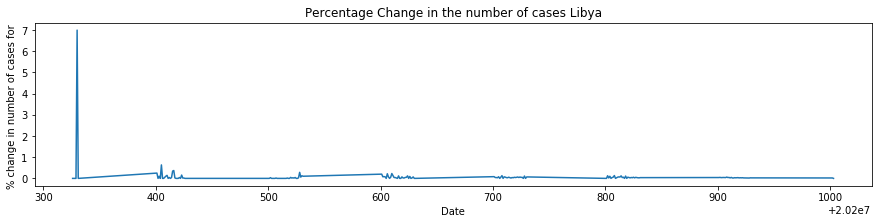

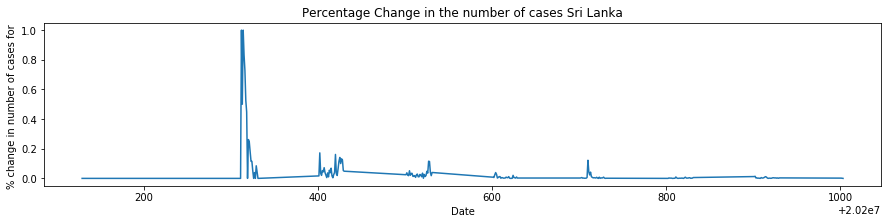

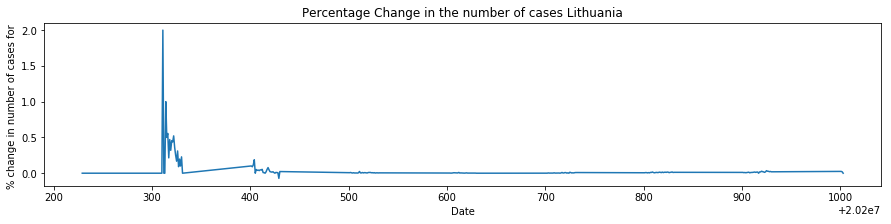

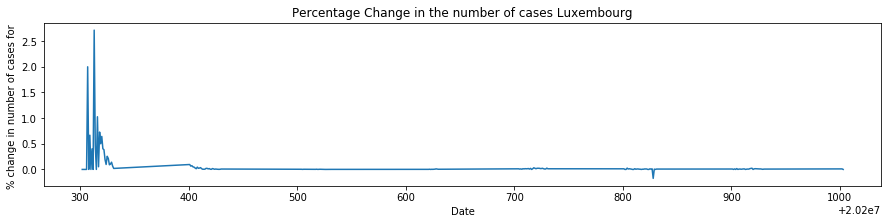

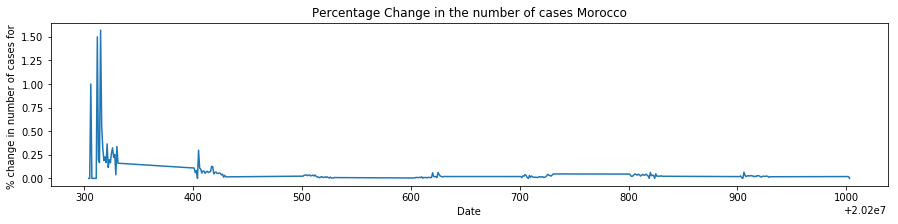

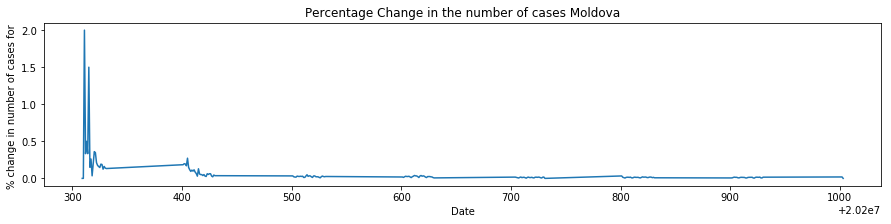

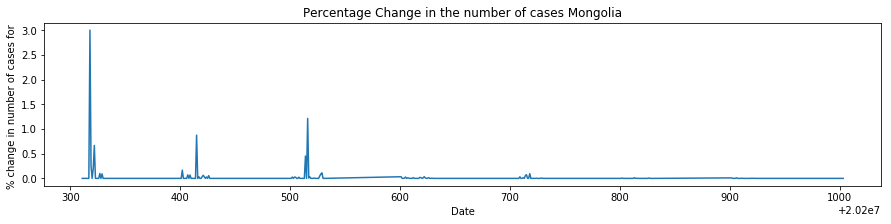

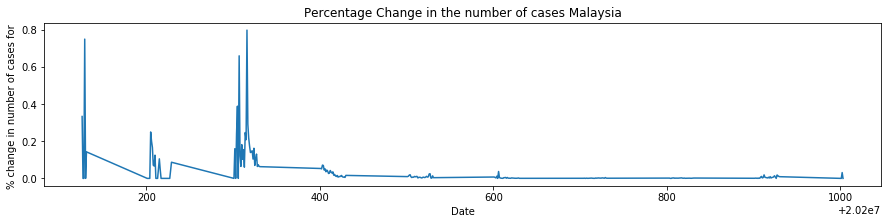

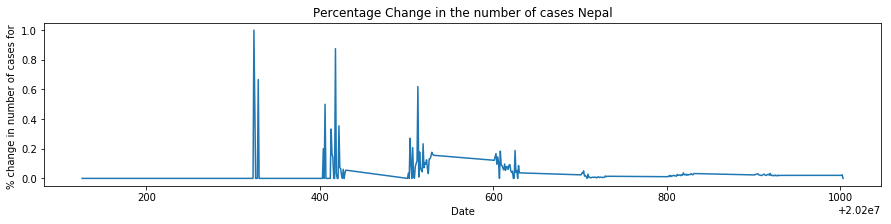

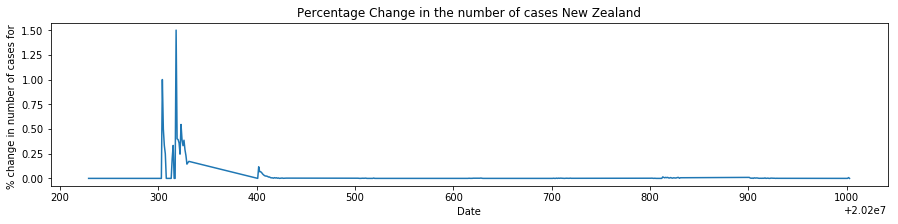

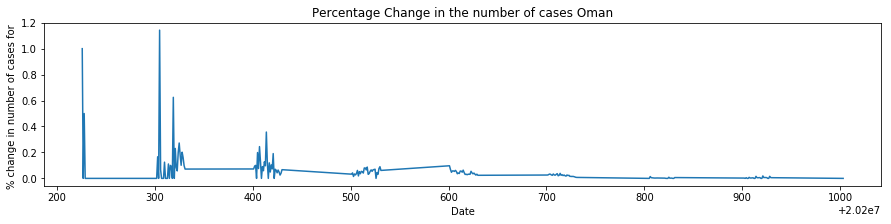

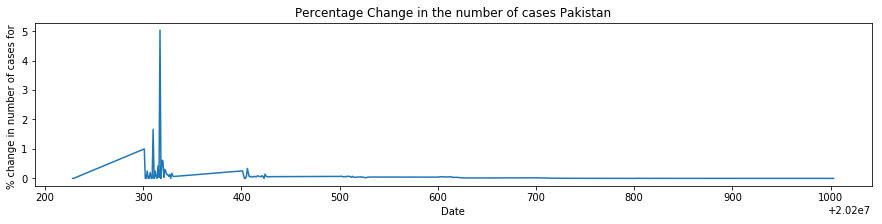

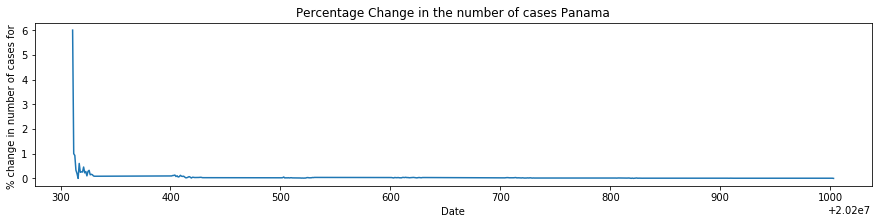

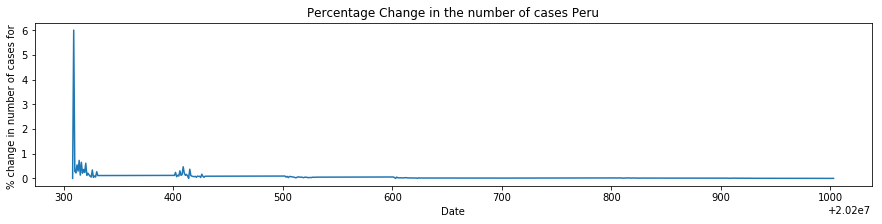

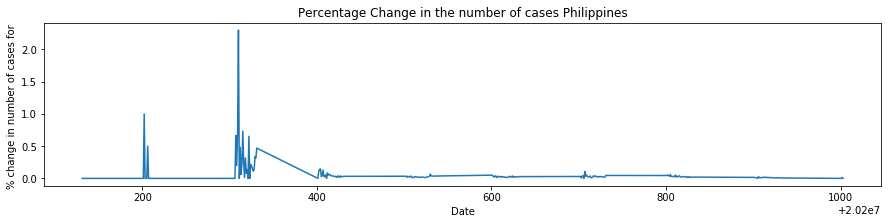

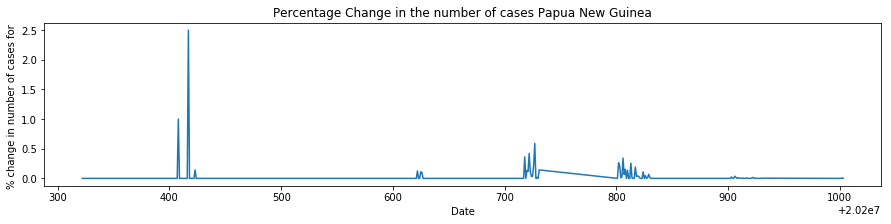

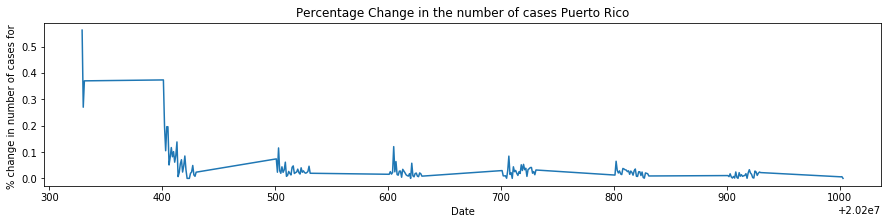

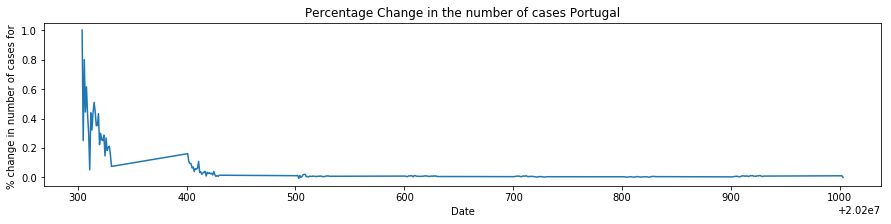

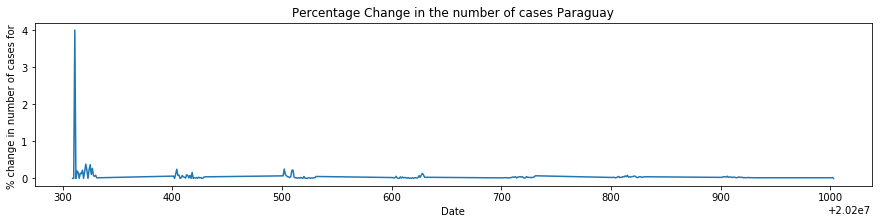

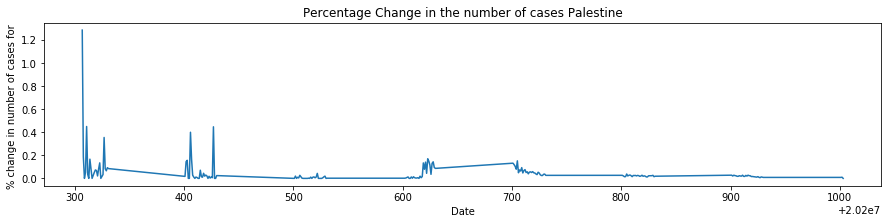

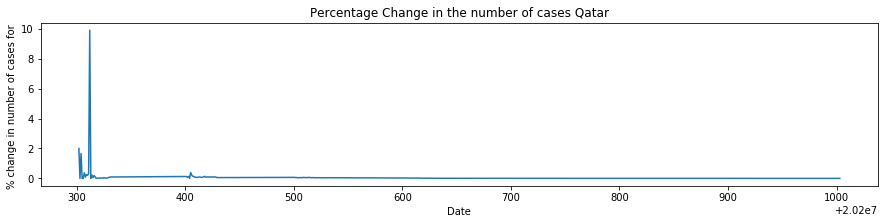

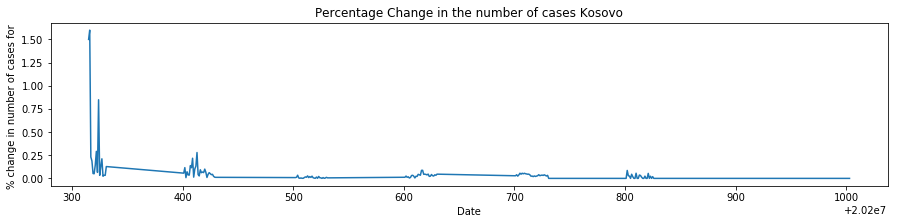

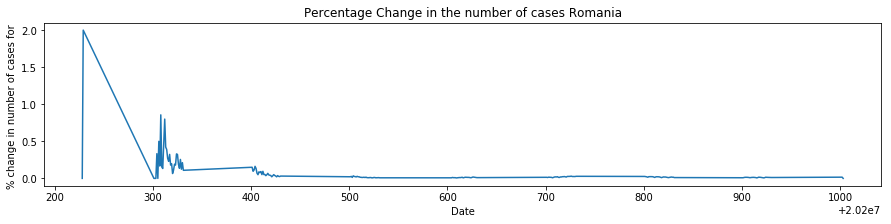

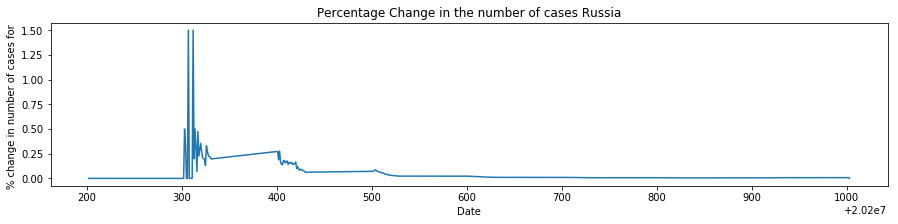

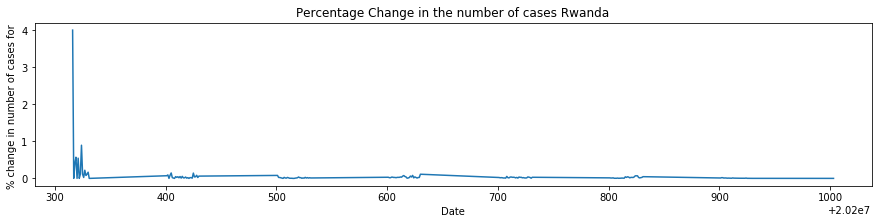

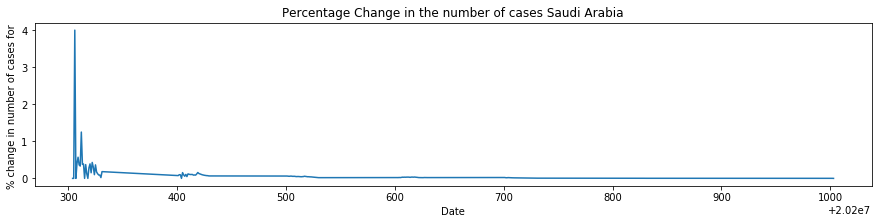

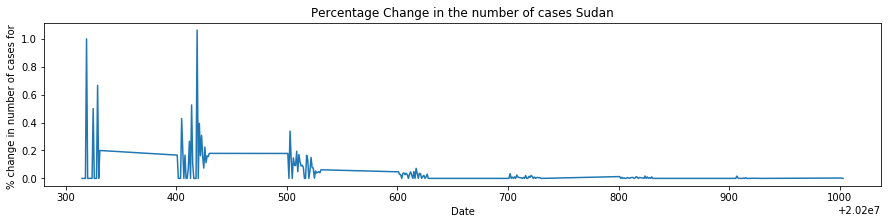

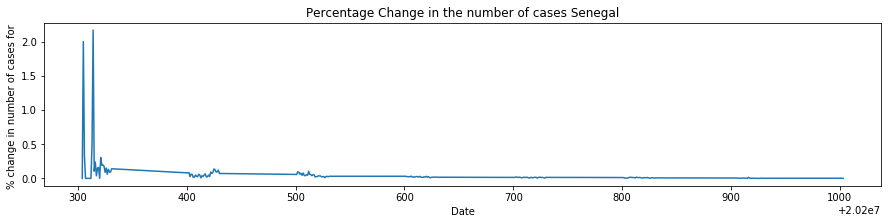

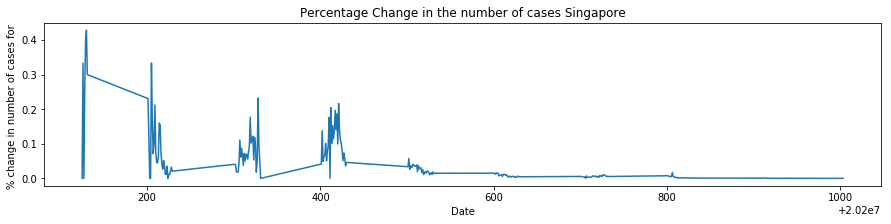

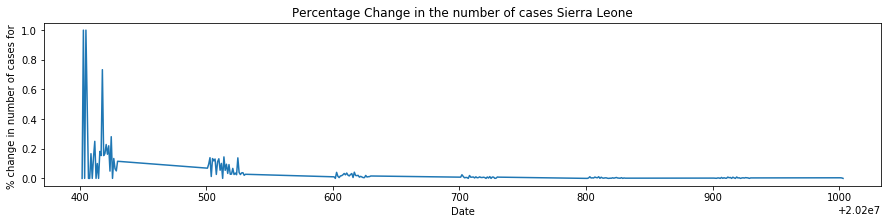

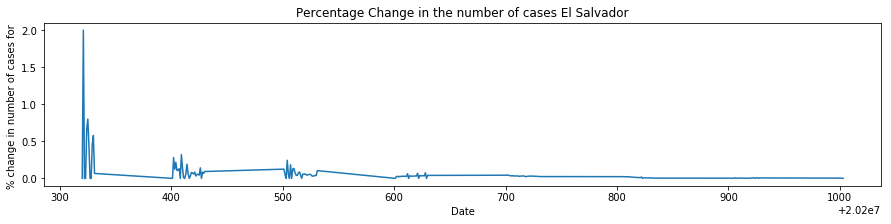

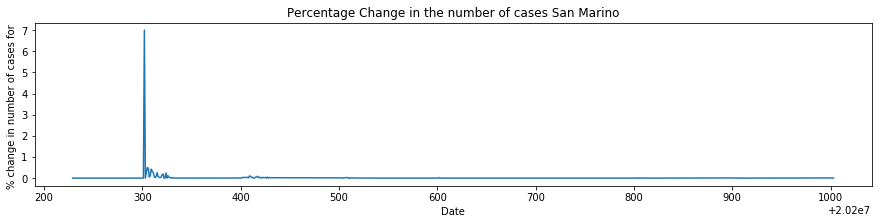

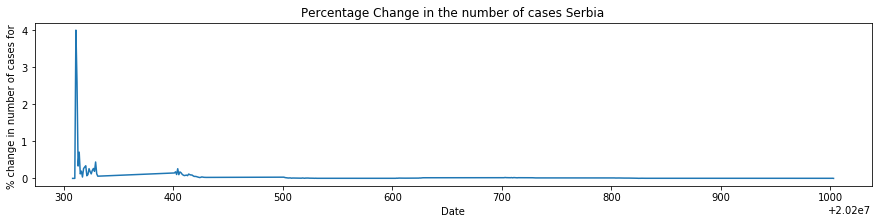

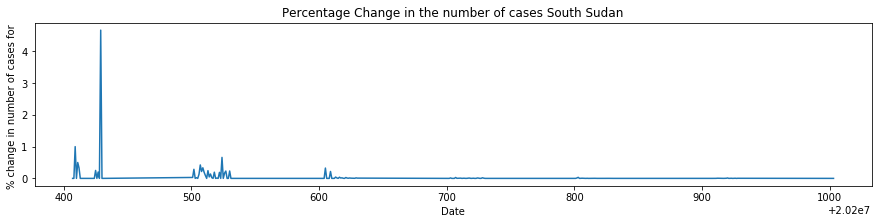

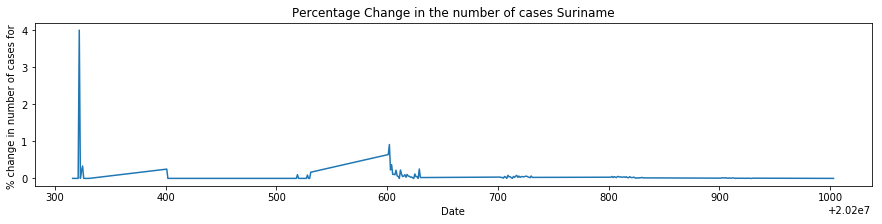

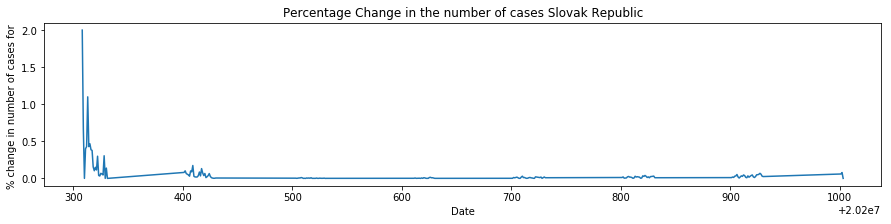

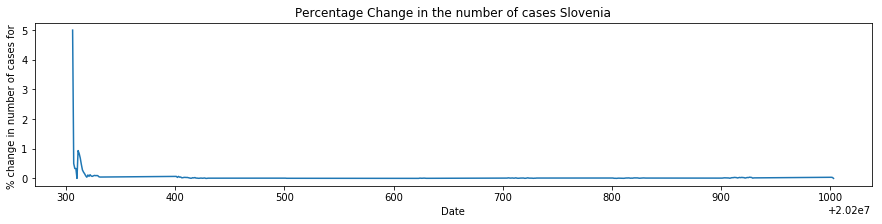

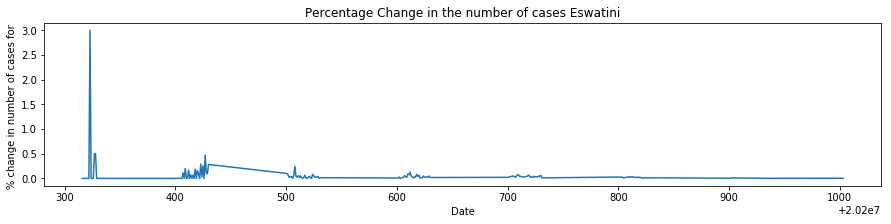

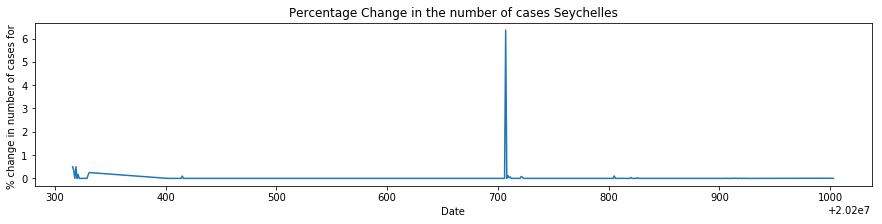

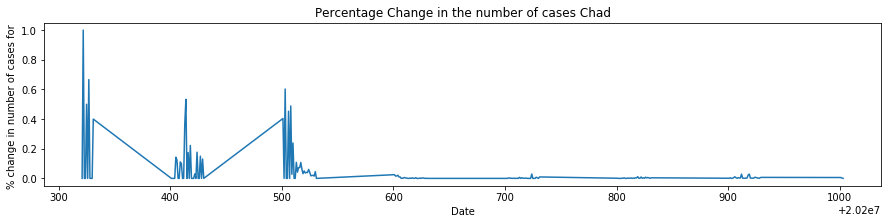

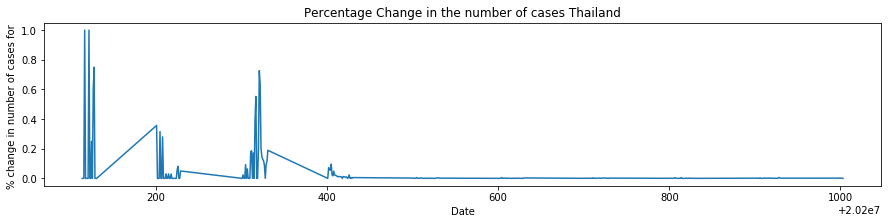

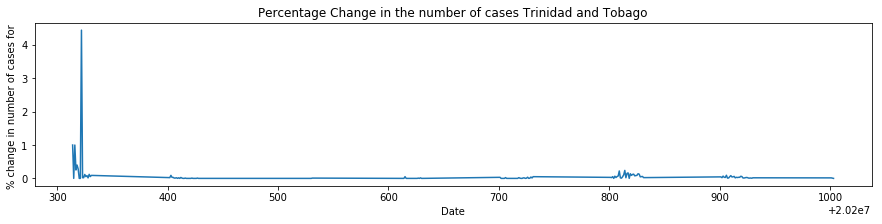

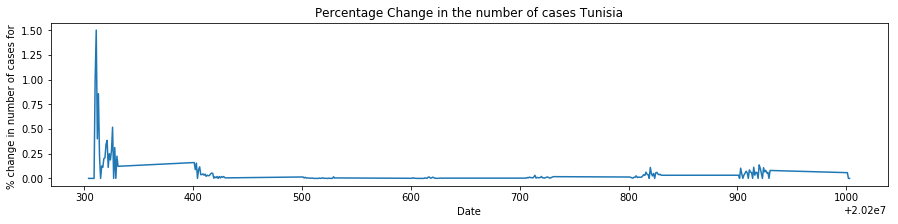

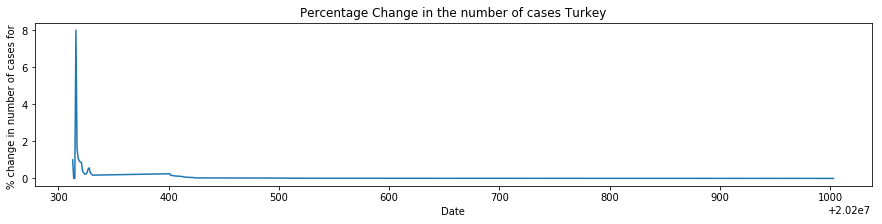

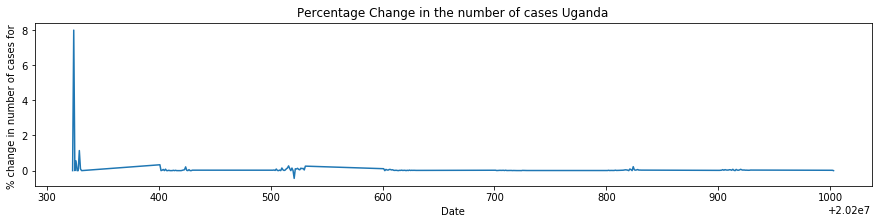

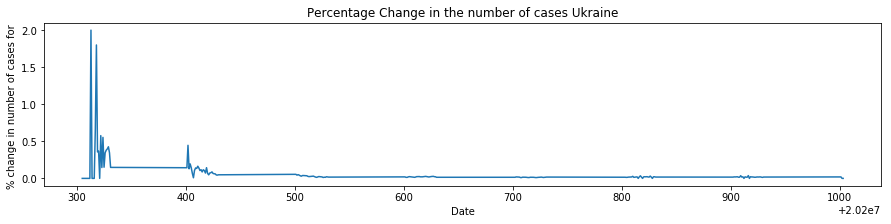

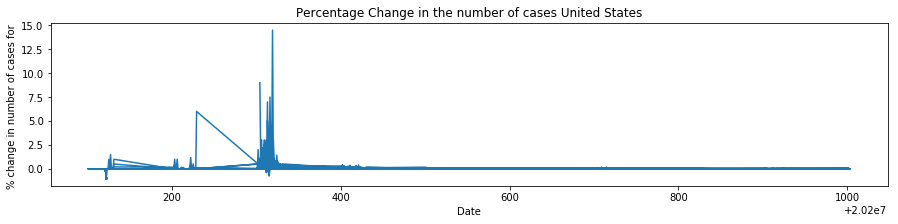

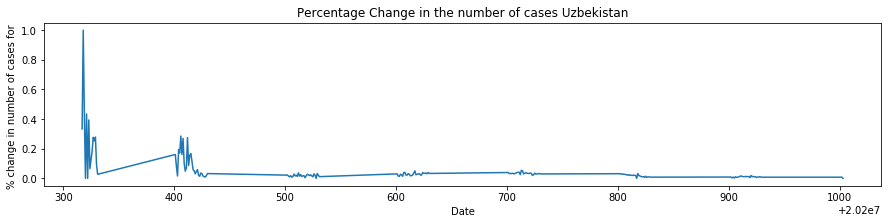

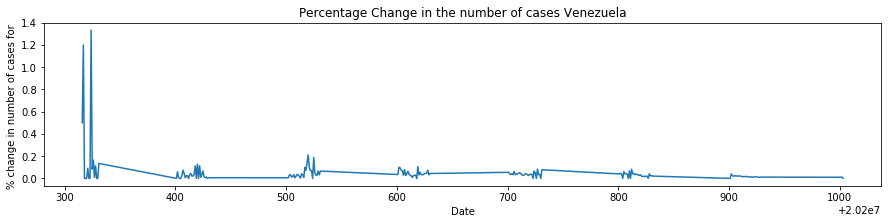

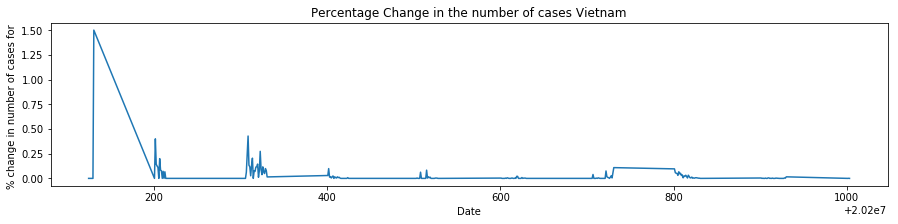

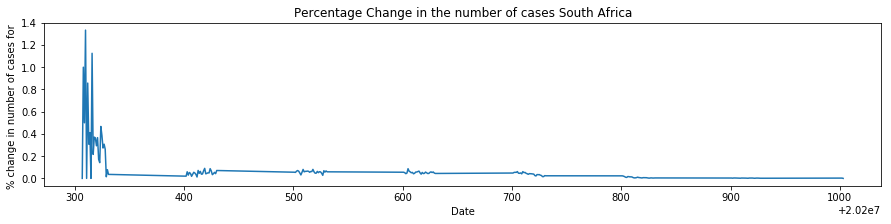

In [17]:
for country in countrydata[countrydata['group']==1]['CountryName'].unique():
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(fulldata[fulldata["CountryName"]==country]["Date"], fulldata[fulldata["CountryName"]==country]["ConfirmedCases"].pct_change())
    plt.title("Percentage Change in the number of cases "+country)
    plt.xlabel("Date")
    plt.ylabel("% change in number of cases for ")

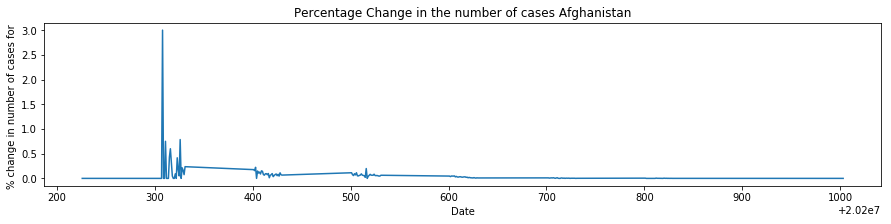

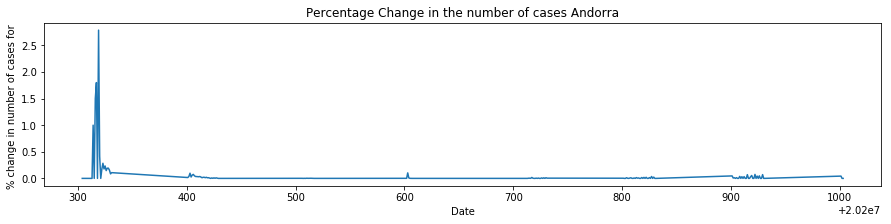

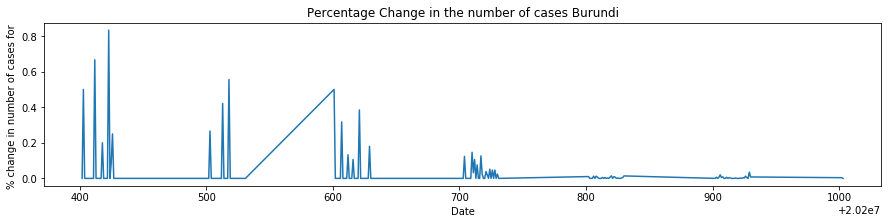

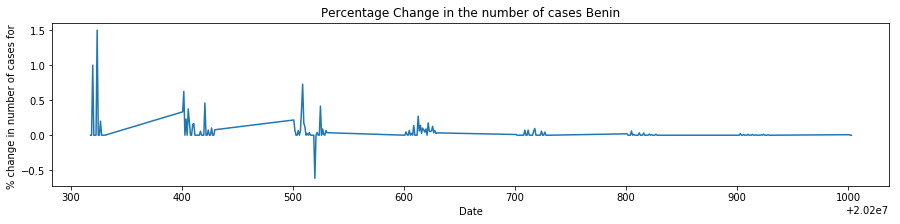

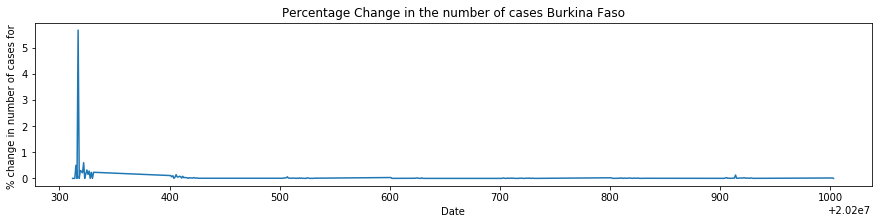

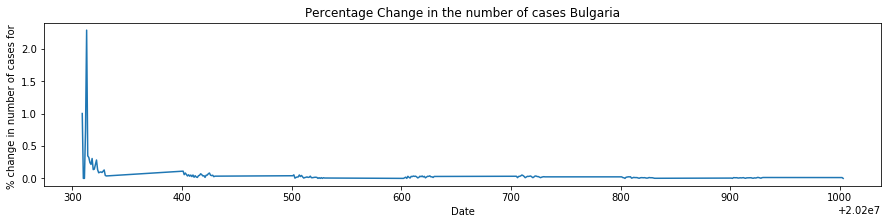

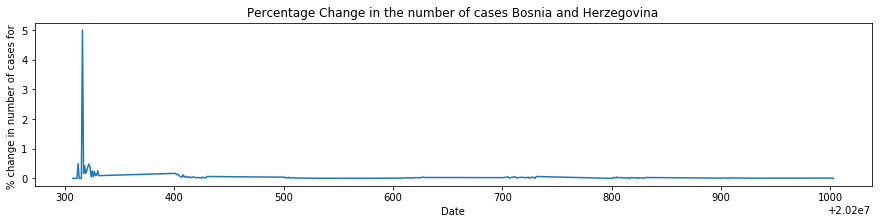

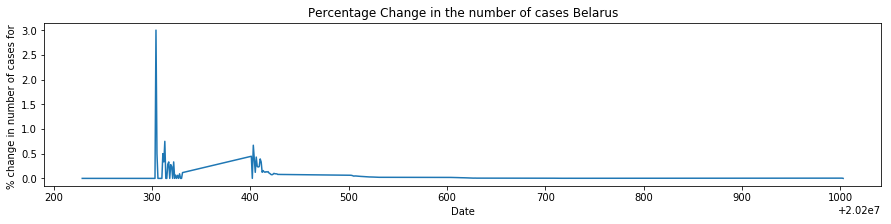

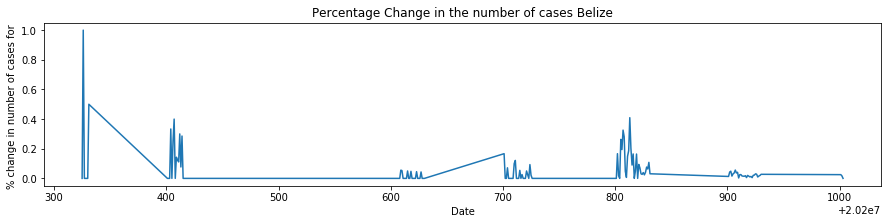

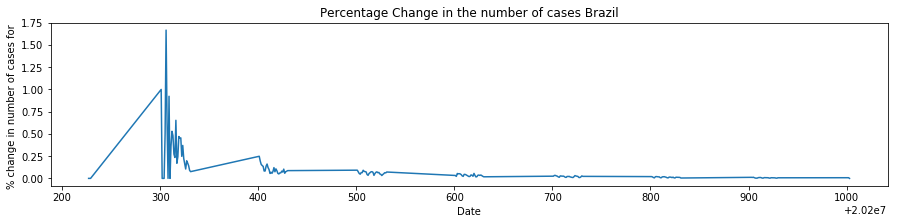

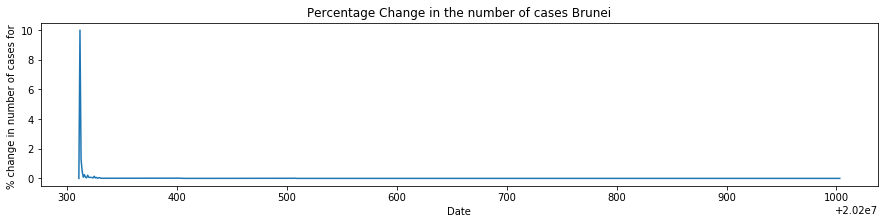

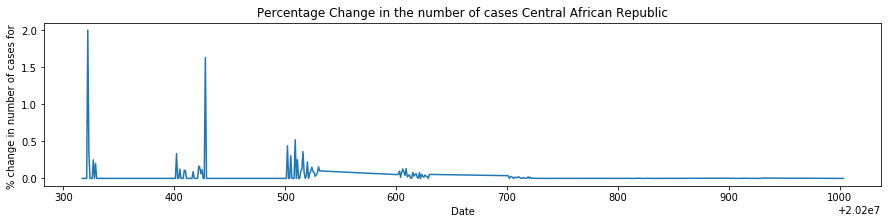

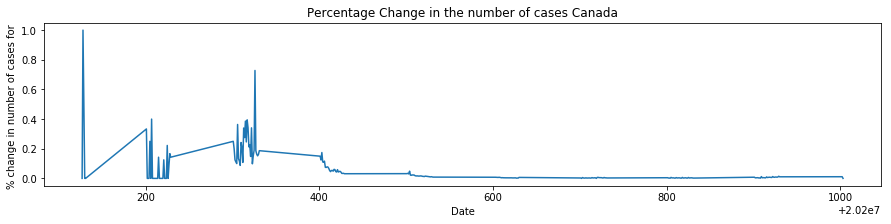

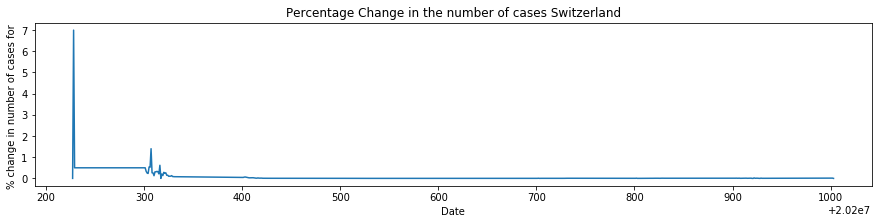

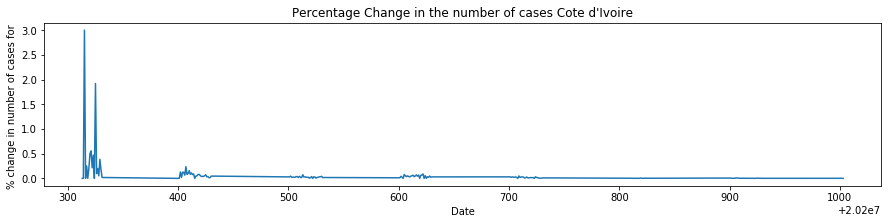

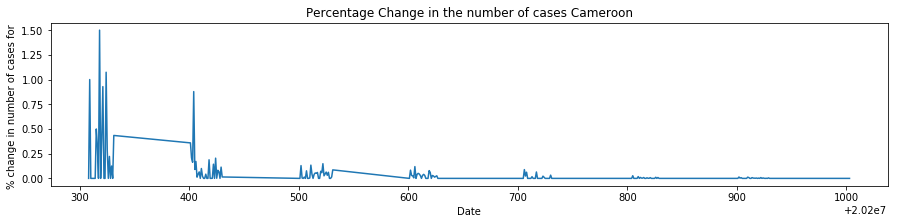

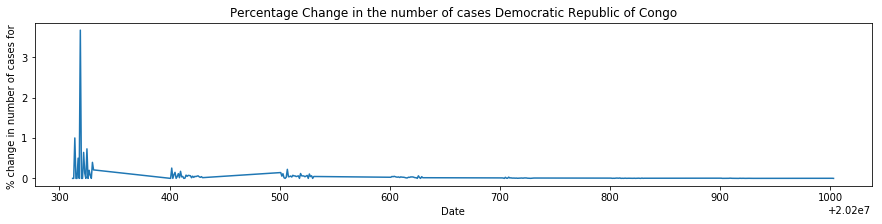

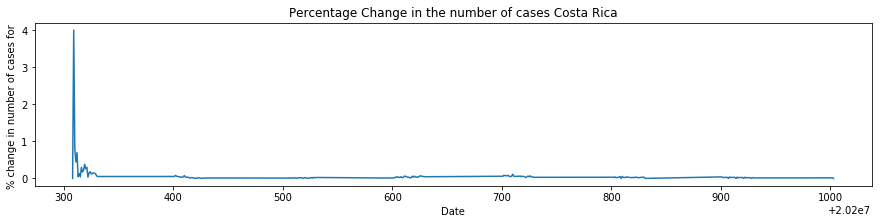

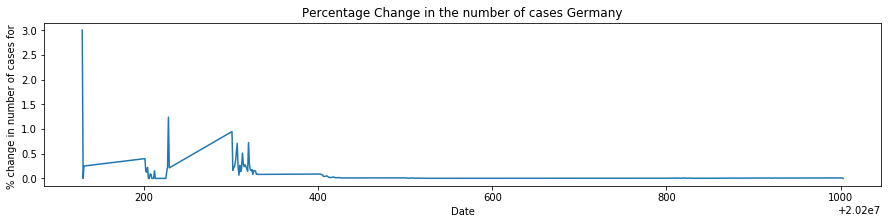

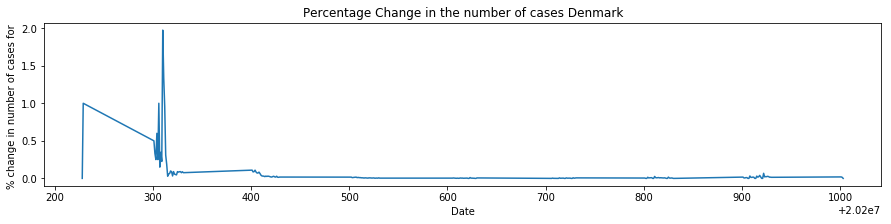

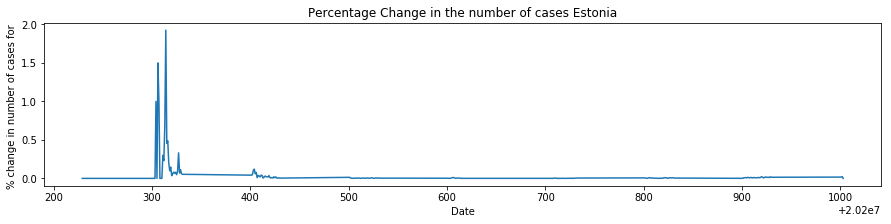

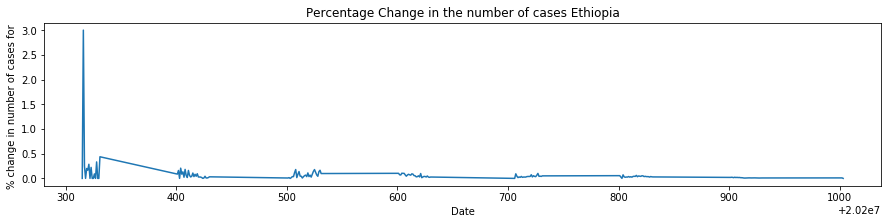

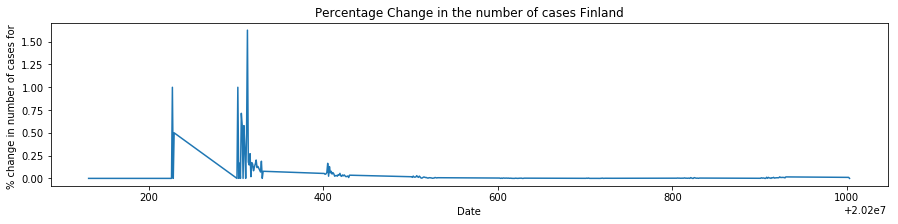

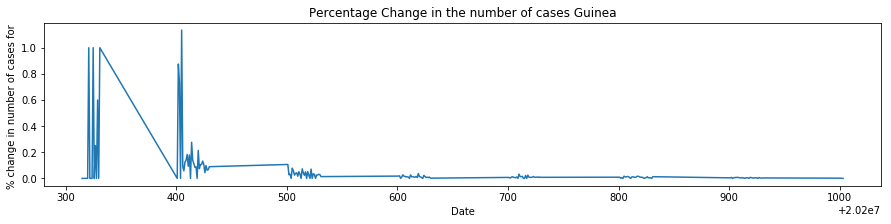

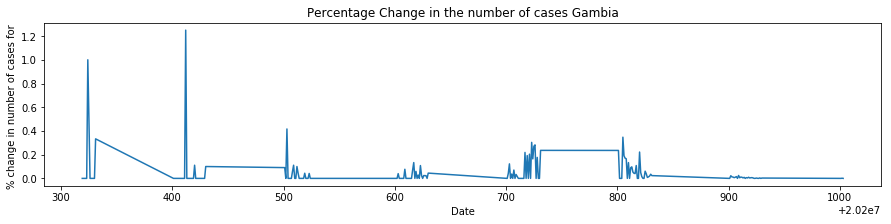

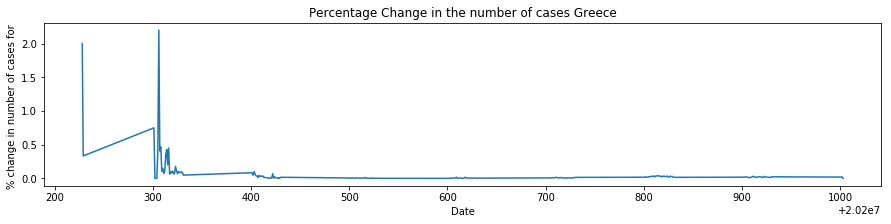

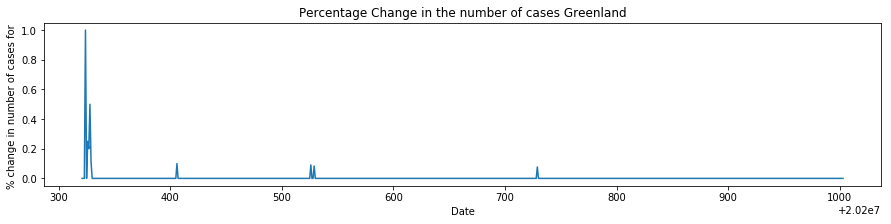

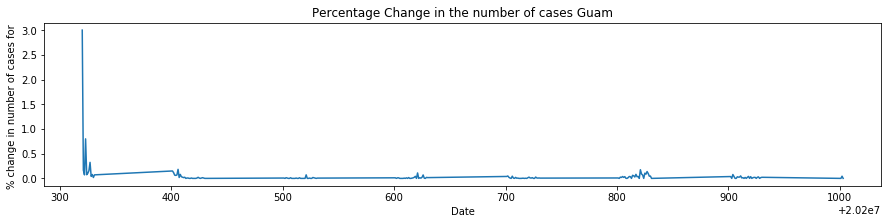

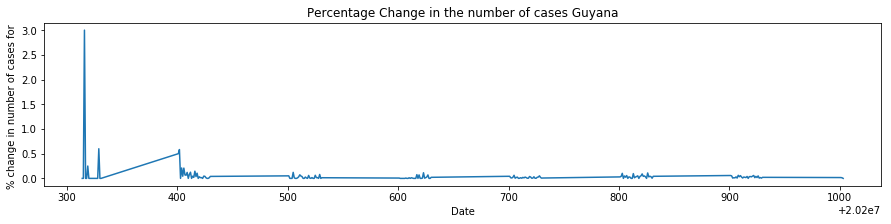

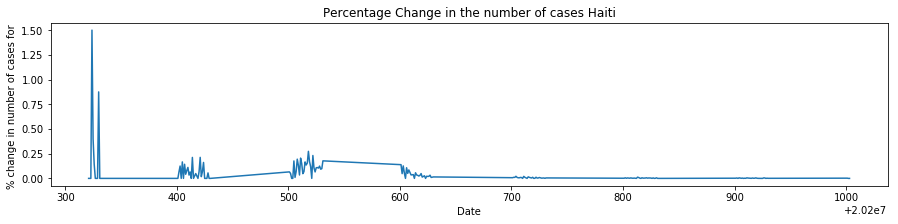

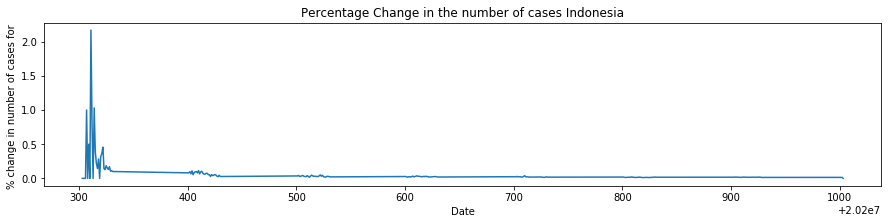

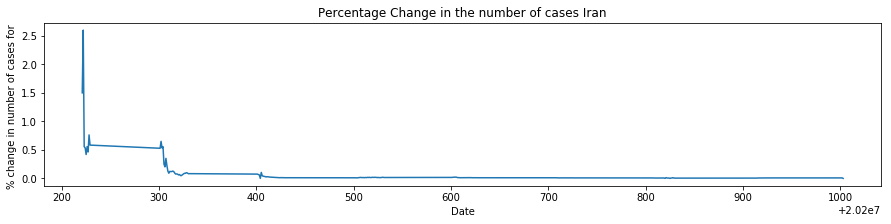

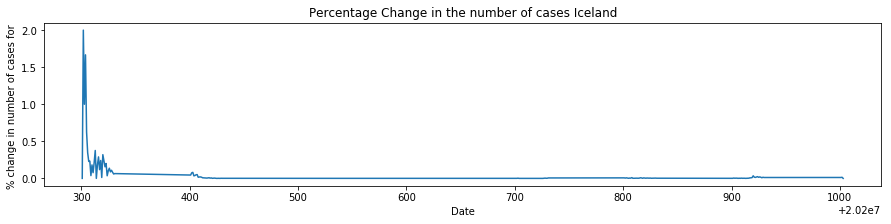

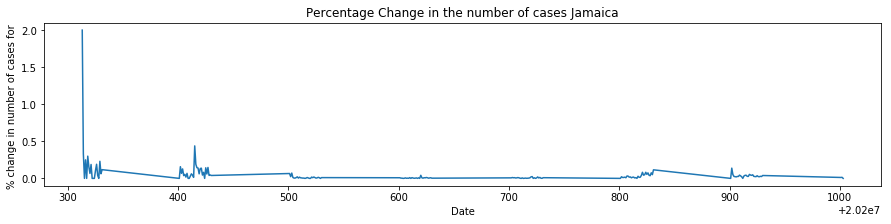

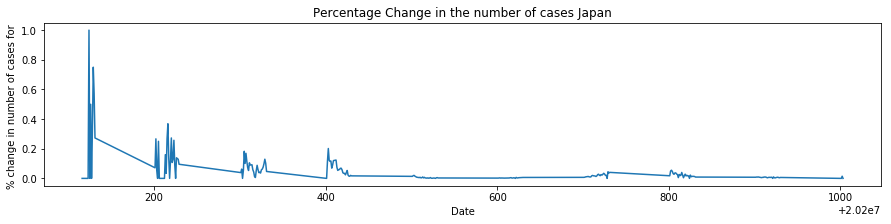

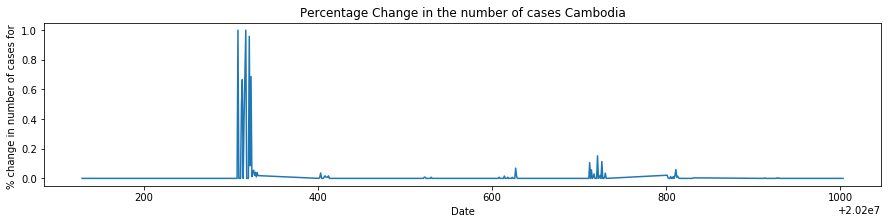

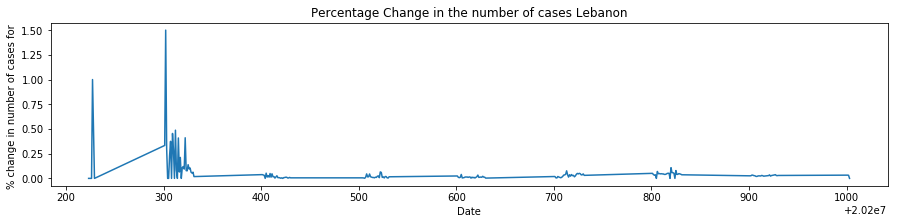

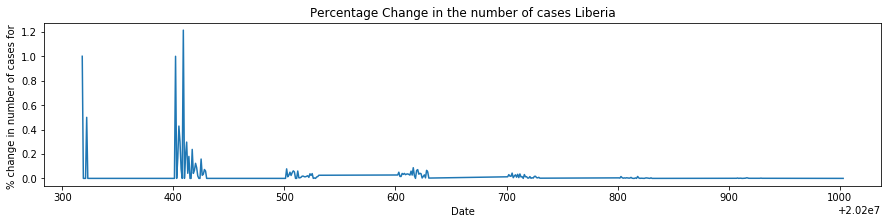

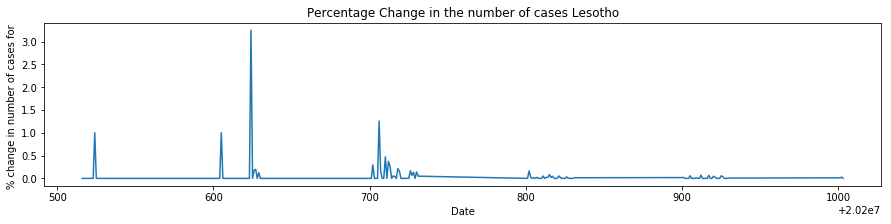

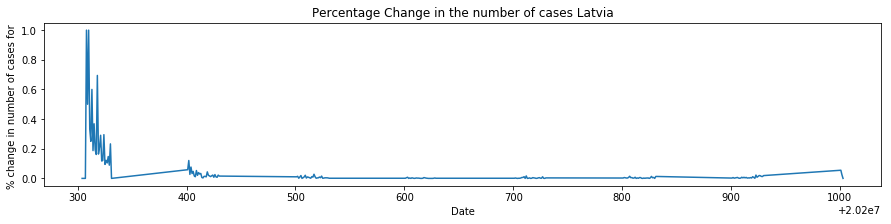

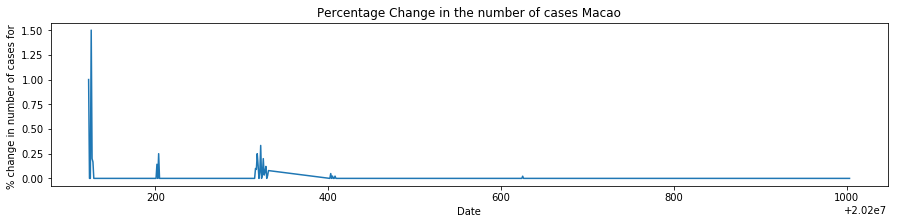

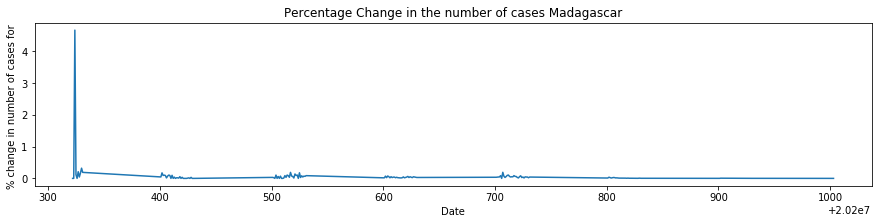

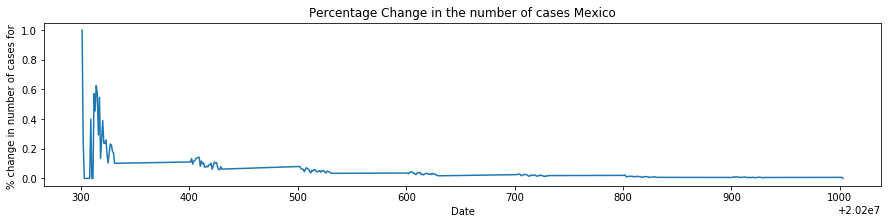

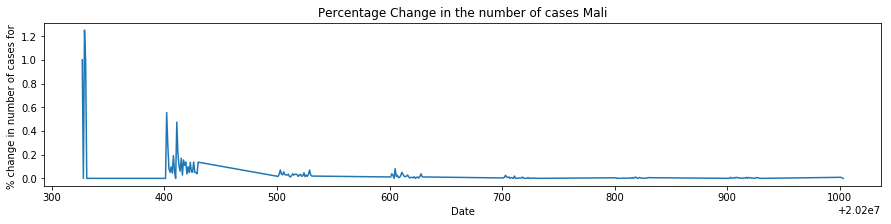

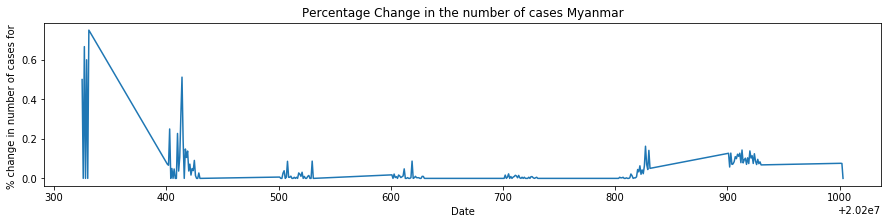

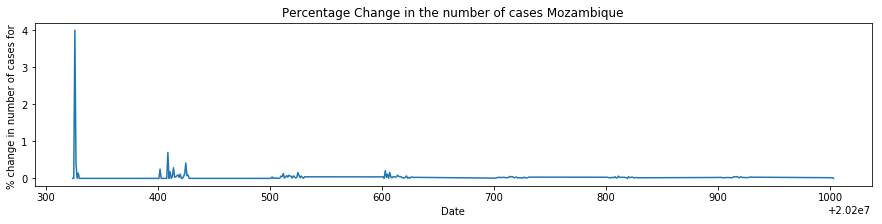

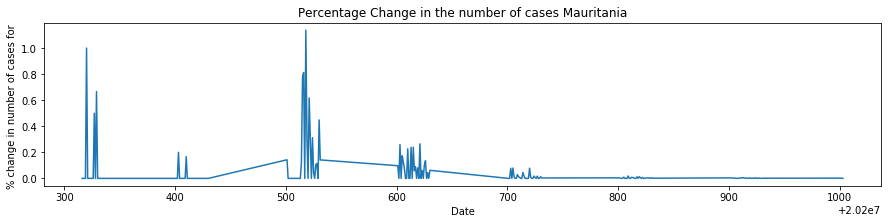

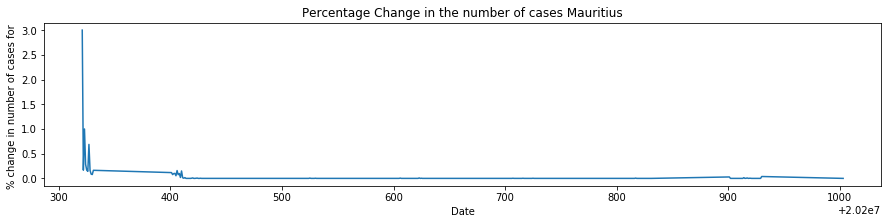

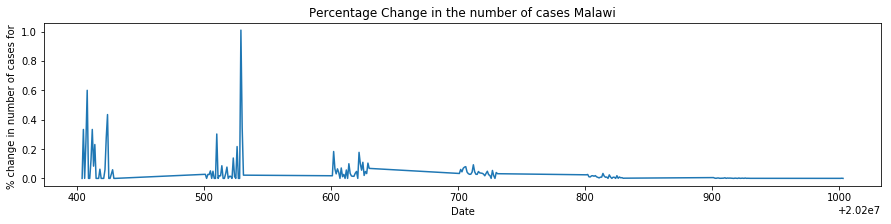

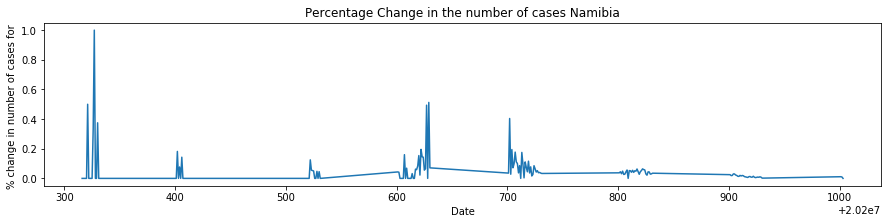

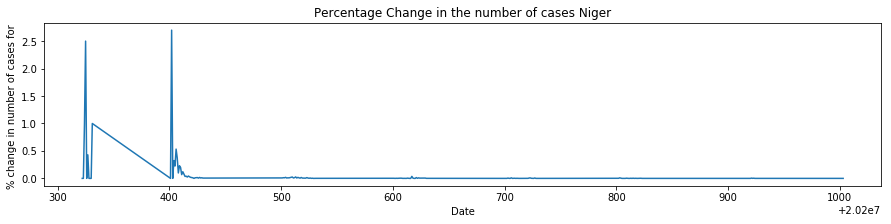

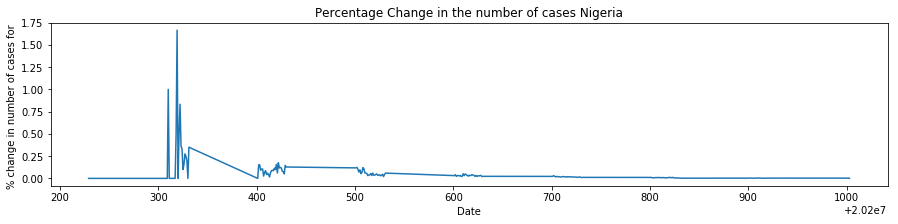

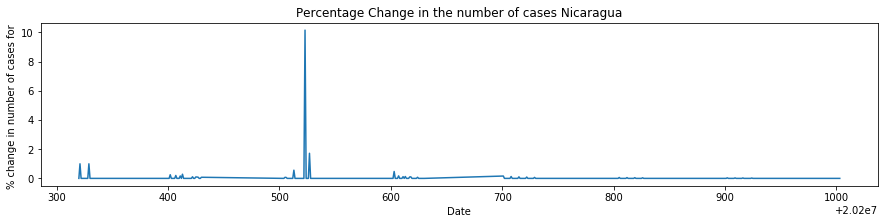

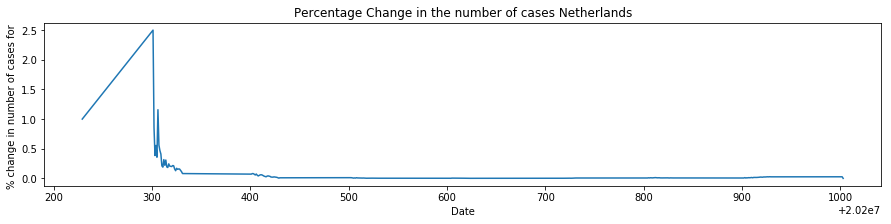

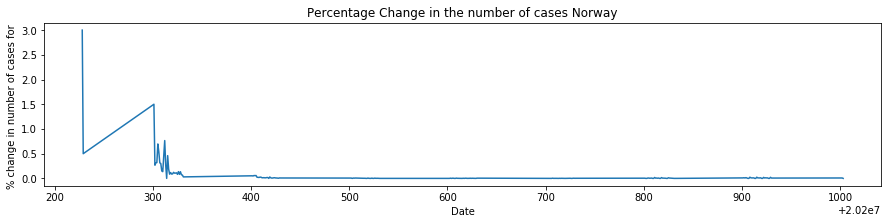

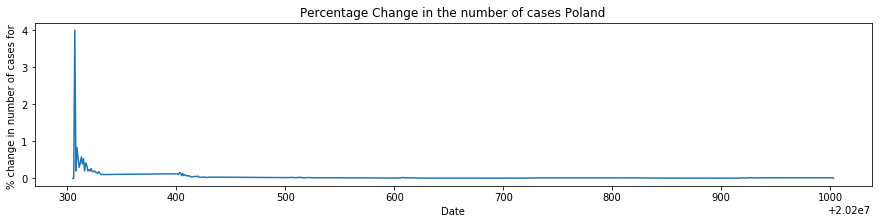

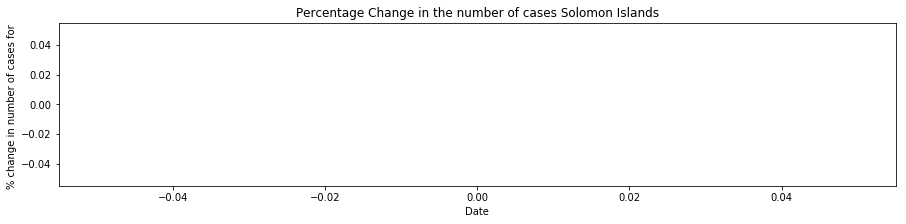

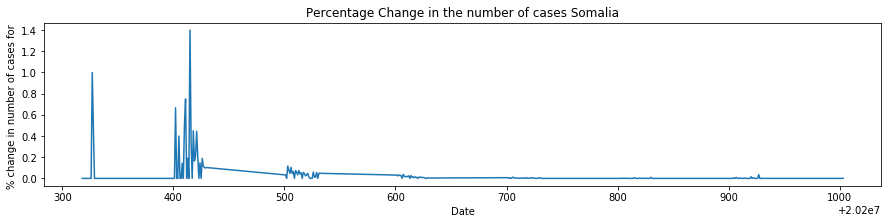

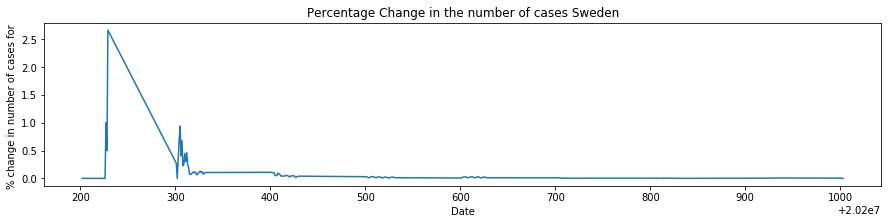

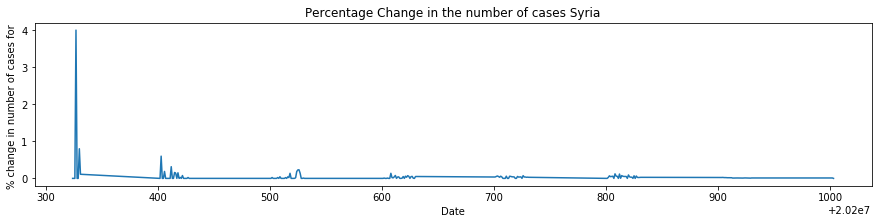

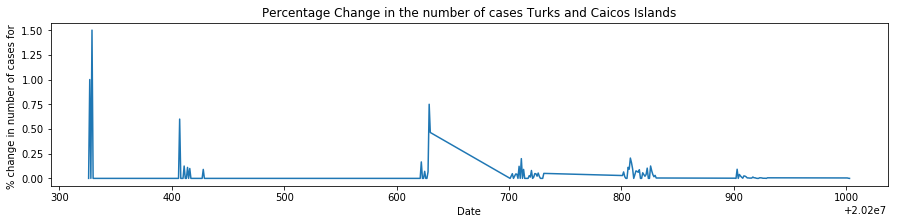

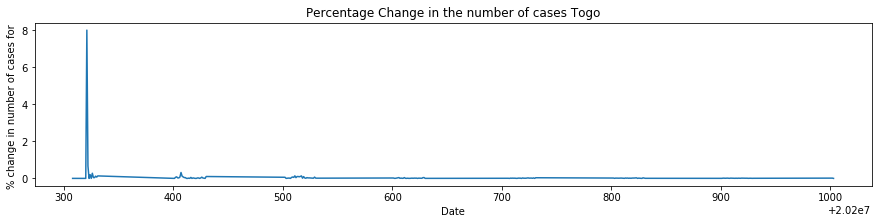

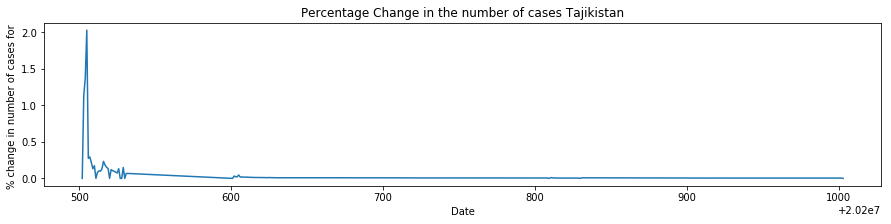

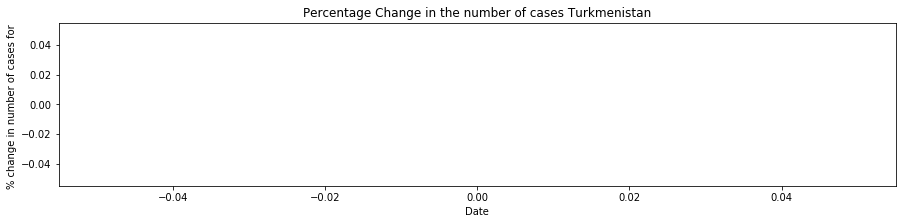

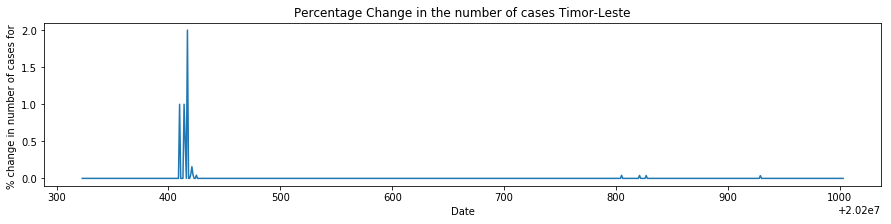

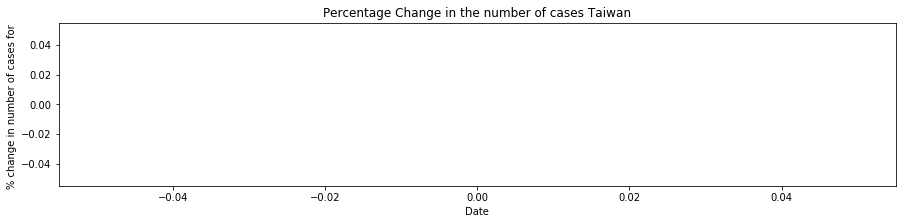

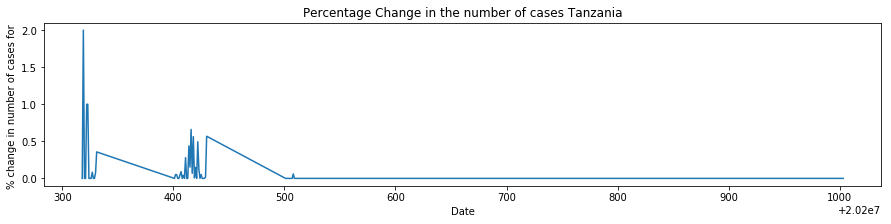

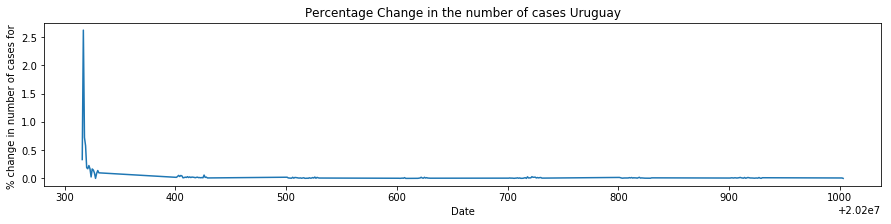

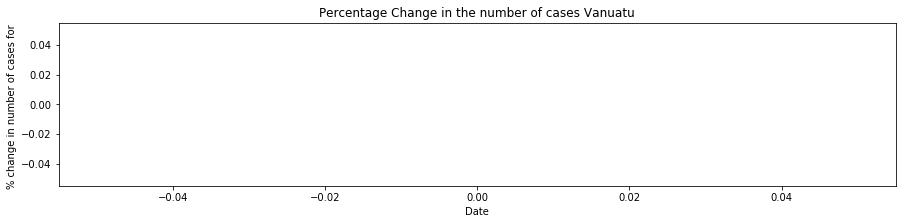

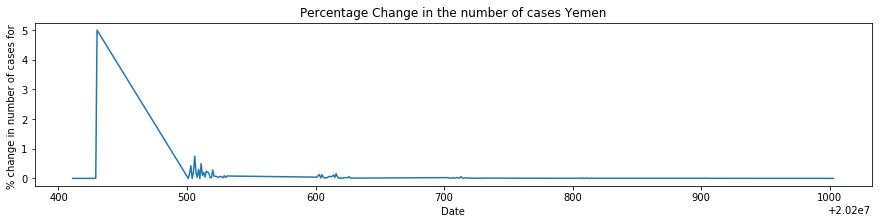

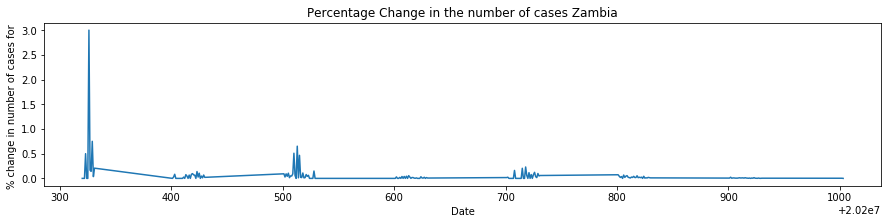

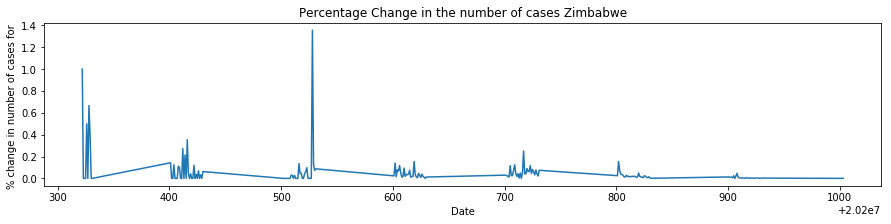

In [18]:
for country in countrydata[countrydata['group']==0]['CountryName'].unique():
    fig, ax = plt.subplots(figsize=(15, 3))
    ax.plot(fulldata[fulldata["CountryName"]==country]["Date"], fulldata[fulldata["CountryName"]==country]["ConfirmedCases"].pct_change())
    plt.title("Percentage Change in the number of cases "+country)
    plt.xlabel("Date")
    plt.ylabel("% change in number of cases for ")

Now calculate the average percentage change:

In [19]:
fulldata['percentagechange']=fulldata["ConfirmedCases"].pct_change().apply(lambda x: 0 if x==np.inf else x)
print((fulldata['percentagechange'].mean()))

for country in countrydata['CountryName'].unique():
    countrydata.loc[countrydata['CountryName']==country,'AvGrowthRate']=fulldata[fulldata["CountryName"]==country]["percentagechange"].mean()


0.0425795939641


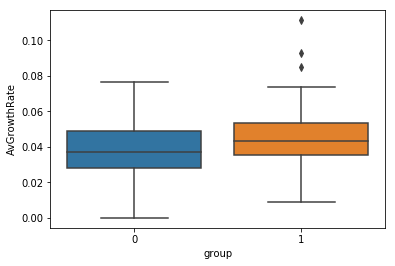

In [20]:
sns.boxplot(y='AvGrowthRate', x ='group', data = countrydata)

Finally, we perform a ttest:

In [50]:
from scipy.stats import  ttest_ind
#T test for different means
a=countrydata[countrydata['group']==1]['AvGrowthRate']
b=countrydata[countrydata['group']==0]['AvGrowthRate']
T,p=ttest_ind(a,b)
print('pvalue:',p)
print("Average for group 1:",a.mean())
print("Average for group 0:",b.mean())

pvalue: 0.00583789171755
Average for group 1: 0.0448248614369
Average for group 0: 0.0377684369413


It looks like considering all countries, group 1 has a statistically significant different mean in the average growth rate of the number of cases. Does that hold for European countries?


# European Countries

In [28]:
countriesineurope=['Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium','Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic','Denmark','Estonia','Finland','France','Georgia','Germany','Greece','Hungary','Iceland','Ireland','Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Lithuania','Luxembourg','Malta','Moldova','Monaco','Montenegro','Netherlands','Macedonia','Norway','Poland','Portugal','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia','Spain','Sweden','Switzerland','Turkey','Ukraine','United Kingdom','Vatican City']
EUcountrydata=countrydata[countrydata['CountryName'].isin(countriesineurope)]


MaxResponse  C1_School closing  C2_Workplace closing  \
count    43.000000          43.000000             43.000000   
mean     76.930698           2.860465              2.465116   
std      12.209916           0.412968              0.701998   
min      25.000000           1.000000              0.000000   
25%      74.040000           3.000000              2.000000   
50%      80.130000           3.000000              3.000000   
75%      84.620000           3.000000              3.000000   
max      96.150000           3.000000              3.000000   

       C3_Cancel public events  C4_Restrictions on gatherings  \
count                43.000000                      43.000000   
mean                  1.906977                       3.651163   
std                   0.366057                       0.948275   
min                   0.000000                       0.000000   
25%                   2.000000                       4.000000   
50%                   2.000000                       4.000000   
75%                   2.000000                       4.000000   
max                   2.000000                       4.000000   

       C5_Close public transport  C6_Stay at home requirements  \
count                  43.000000                     43.000000   
mean                    1.139535                      1.860465   
std                     0.774025                      0.888589   
min                     0.000000                      0.000000   
25%                     1.000000                      1.000000   
50%                     1.000000                      2.000000   
75%                     2.000000                      2.000000   
max                     2.000000                      3.000000   

       C7_Restrictions on internal movement  C8_International travel controls  \
count                             43.000000                         43.000000   
mean                               1.720930                          3.581395   
std                                0.629648                          0.586862   
min                                0.000000                          2.000000   
25%                                2.000000                          3.000000   
50%                                2.000000                          4.000000   
75%                                2.000000                          4.000000   
max                                2.000000                          4.000000   

       E1_Income support  E2_Debt/contract relief  \
count          43.000000                43.000000   
mean            1.697674                 1.604651   
std             0.513387                 0.583076   
min             0.000000                 0.000000   
25%             1.000000                 1.000000   
50%             2.000000                 2.000000   
75%             2.000000                 2.000000   
max             2.000000                 2.000000   

       H1_Public information campaigns  H2_Testing policy  H3_Contact tracing  \
count                        43.000000          43.000000           43.000000   
mean                          1.976744           2.372093            1.860465   
std                           0.152499           0.618110            0.412968   
min                           1.000000           1.000000            0.000000   
25%                           2.000000           2.000000            2.000000   
50%                           2.000000           2.000000            2.000000   
75%                           2.000000           3.000000            2.000000   
max                           2.000000           3.000000            2.000000   

       H4_Emergency investment in healthcare  H5_Investment in vaccines  \
count                           4.300000e+01               4.300000e+01   
mean                            2.169000e+09               7.096003e+07   
std                             9.602268e+09               1.752872e+08   
min                 

We redefine the groups based on the new mean of max response rate which is now 77.

In [51]:
EUcountrydata['group']=EUcountrydata['MaxResponse'].apply(lambda x: 1 if x>77 else 0)
#T test for different means
a=EUcountrydata[EUcountrydata['group']==1]['AvGrowthRate']
b=EUcountrydata[EUcountrydata['group']==0]['AvGrowthRate']
T,p=ttest_ind(a,b)
print(p)
print("Average for group 1 in Europe:",a.mean())
print("Average for group 0 in Europe:",b.mean())

0.785811163035
Average for group 1 in Europe: 0.0511278387545
Average for group 0 in Europe: 0.0499264417091


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


When considering countries in Europe, there is no significant difference between the average growth rate of the number of COVID cases between the two groups of countries. 

# **Conclusions**
The exploratory data analysis suggested a possible hypothesis that the countries with lower maximum response rate would have different average growth rate of the number of cases.

This hypothesis was tested for a) all countries available in the dataset and b) European countries available in the dataset.
The countries were divided into two groups: group 1 had maximum response rate higher than the mean across the group ( In case a 75 and b 77), and group 0 had the maximum response rate equal or lower than the mean across the group.
Then, the average growth of number of cases was estimated taking the mean of percentage change in the number of cases throughout the pandemic. Note, this is a very primitive way to estimate the quantity of interest because we would be interested in the average growth rate of the number of cases *after* the imposition of the maximum response. 
Finally, the t test was performed to evaluate if any statistically significant difference  exists between the mean average growth rate of the number of cases between the two groups.

The results are as follows:

a) pvalue: 0.00583789171755,
Average growth rate for group 1: 0.0448248614369, 
Average growth rate for group 0: 0.0377684369413

b) pvalue: 0.785811163035, 
Average growth rate for group 1 in Europe: 0.0511278387545, 
Average growth rate for group 0 in Europe: 0.0499264417091

Clearly, the maximum response rate of European countries had no significant effect in explaining the average growth rate of the number of cases, while some significance was observed across all countries in the dataset. This suggests that European countries imposed similar level of pandemic control and thus should be grouped not according to the response rate but rather by geographic/demographic features if the effect of different mitigation measures were to be investigated.

If this direction of ivestigation was chosen, more elaborate methods should be used to re-evaluate the relationship. 